In [1]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import openpyxl
import geopandas as gpd
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\geopandas\_compat.py:88: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import metrics     
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve  

In [3]:
#옵션

#pd.set_option('display.max_row', 500)
#pd.set_option('display.max_columns', 100)

In [4]:
Qgis_data = gpd.read_file('point)9,3,3,5_2창원시동_조인오류2개해결.geojson') #qgis를 통해 만든 파일

In [5]:
TAAS_data =pd.read_excel('1618_통합.xlsx')                                  #16-18년도 TAAS 차대사람 통합파일

In [6]:
# 내가 생각하는 순서

#0 논문 앞에 이론적 배경 넣어주기

# 1, 결합                         -- 완벽하게 이해요망
# 2. 결측치 처리                  -- 다시 확인하고
# 3. 이상치 확인                  -- 새로 작업

##여기서 소수클래스는 묶어서 원핫처리??


#     변수 추가(--,--) 
# 4. 수치/범주형으로 변환         -- 완벽한 이해요망
# 5. 알맞는 표현식으로 변환       -- 준비중



# EDA 해야징  (부분 시각화작업이겠지??)
### EDA하고 나서 순환속성 변수로 변환해야겠다


# 6. 상관계수 분석                -- 많은 변수를 하면 시각화가
# ## vif 작업도 꼭꼭꼭 병행하자!!!!!!!!!!!!!


# 7. 분산 분석
# 8. 정규화
# 9. 최종 사용할 변수 선택
#=======쉬는날 하루면 될듯=============


# 머신러닝

# 하이퍼 파라미터

# 결과 해석 후 글쓰기 
#===========하루=======================
# 주석 달때 상황과 인수도 같이 적어주자

# 데이터 통합

### 전처리1 merge

In [7]:
#Qgis_data.head()
#TAAS_data.head()

In [8]:
print(int(str(TAAS_data['사고번호'][0])[0:8]))
print(" ".join(TAAS_data['시군구'][1].split(' ')[1:3]))
print(TAAS_data['사고일시'][0][-3:-1])

20160101
창원시 마산합포구
12


In [9]:
#새로운 열로 재 갱신한것 같군

TAAS_data['OCCU_DATE']=0
TAAS_data['SIG_KOR_NM']=0
#TAAS_data['OCCU_TM']=0


for i in range(len(TAAS_data)):
    TAAS_data['OCCU_DATE'][i]=int(str(TAAS_data['사고번호'][i])[0:8])
    TAAS_data['SIG_KOR_NM'][i]=" ".join(TAAS_data['시군구'][i].split(' ')[1:3])
    #TAAS_data['OCCU_TM'][i]=TAAS_data['사고일시'][i][-3:-1]
    
TAAS_data['LCLAS'] = TAAS_data['사고내용']

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [11]:
pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')[pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left').duplicated(['OCCU_DATE','시군구'])]

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
20,609189,2018,11,10,17,토요일,20181110,중상사고,차대사람,0,...,맑음,단일로 - 기타,승용,남,30세,상해없음,보행자,남,39세,중상
69,609183,2018,10,31,20,수요일,20181031,중상사고,차대사람,0,...,맑음,교차로 - 교차로횡단보도내,승용,남,35세,상해없음,보행자,남,46세,중상
86,608986,2017,02,09,12,목요일,20170209,경상사고,차대사람,0,...,맑음,단일로 - 기타,승용,남,19세,상해없음,보행자,남,51세,경상
92,609151,2018,07,31,12,화요일,20180731,중상사고,차대사람,0,...,맑음,교차로 - 교차로부근,승용,여,48세,상해없음,보행자,여,3세,중상
93,609190,2018,11,10,19,토요일,20181110,중상사고,차대사람,0,...,맑음,교차로 - 교차로횡단보도내,승용,남,41세,상해없음,보행자,남,42세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,607961,2016,09,07,20,수요일,20160907,중상사고,차대사람,0,...,맑음,단일로 - 횡단보도부근,승용,여,33세,상해없음,보행자,여,5세,중상
2715,607961,2016,09,07,20,수요일,20160907,중상사고,차대사람,0,...,맑음,교차로 - 교차로안,승용,남,43세,상해없음,보행자,여,64세,중상
2718,608031,2018,05,07,21,월요일,20180507,경상사고,차대사람,0,...,맑음,단일로 - 기타,화물,남,55세,상해없음,보행자,남,31세,경상
2719,608031,2018,05,07,21,월요일,20180507,경상사고,차대사람,0,...,흐림,단일로 - 기타,승용,여,49세,상해없음,보행자,남,52세,경상


In [12]:
pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')['시군구'].isnull().sum() #??

26

In [13]:
merge_df = pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left') #???

In [14]:
df =merge_df.drop_duplicates(['OBJT_ID'], keep='last')   #??

In [15]:
print(merge_df.shape)
print(df.shape)

(2728, 93)
(2282, 93)


In [16]:
# 왜 재갱신 한걸까? 어떤걸 드랍했지?

# 드랍한것' 
# 사고번호', '사고일시',                                                    (의미없음/중복)
#'요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수'  (중복됨)
# 순서 조정겸

df = df[['OBJT_ID', 'OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM', 'OCCU_DAY',
       'OCCU_DATE', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN', 'INJPSN',
       'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y', '차대사람_2_은행_거리_BANK_NM_TargetID',
       '차대사람_2_은행_거리_BANK_NM_Distance', '차대사람_1_교차로_거리_NAME_TargetID',
       '차대사람_1_교차로_거리_NAME_Distance', '차대사람_3_의료기관_거리_의료기관명_TargetID',
       '차대사람_3_의료기관_거리_의료기관명_Distance', '차대사람_4_버스정류장_거리_정류장명_TargetID',
       '차대사람_4_버스정류장_거리_정류장명_Distance', '차대사람_5_유치원_거리_유치원명_TargetID',
       '차대사람_5_유치원_거리_유치원명_Distance', '차대사람_6_시외버스터미널_거리_터미널이름_TargetID',
       '차대사람_6_시외버스터미널_거리_터미널이름_Distance', '차대사람_7_육교_거리_육교번호_TargetID',
       '차대사람_7_육교_거리_육교번호_Distance', '의료기관_점갯수', 'HOUS_mean', 'POP_mean',
       'POP_10_mean', 'POP_20_mean', 'POP_30_mean', 'POP_40_mean',
       'POP_50_mean', 'POP_60_O_mean', '차대사람_8_아동,어린이집_거리_번호_TargetID',
       '차대사람_8_아동,어린이집_거리_번호_Distance', '차대사람_9_노인정_거리_번호_TargetID',
       '차대사람_9_노인정_거리_번호_Distance', '의료면적_ARCHAREA', '의료면적_TOTALAREA',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점',
       '도로중심선_DVYN', '도로중심선_RDLN', '도로중심선_RVWD', '도로중심선_ONSD', '도로중심선_ROAD_BT',
       '도로중심선_real_ROAD_BT', 'STRU', 'length', 'won_RN', 'won_ROAD_LT',
       'won_real_ROAD_BT', 'like도로_jibun', '인도_BYYN', '인도_KIND', 'SIG_KOR_NM',
       '창원시동_EMD_KOR_NM', 'geometry',
       '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']]

### 전처리2 컬럼명 재지정/순서 세팅

In [17]:
df.rename(columns={'OBJT_ID':'id',
                   'OCCU_YEAR':'사고년도',
                   'OCCU_MT':'사고월',
                   'OCCU_DE':'사고일자',
                   'OCCU_TM':'사고시간',
                   'OCCU_DAY':'사고요일',
                   'OCCU_DATE':'사고년월일',
                   'LCLAS':'사고형태(Y값)',
                   'SCLAS':'사고구분',
                   'DEATH':'사망자수',
                   'SWPSN':'중상자수',
                   'SINJPSN':'경상자수',
                   'INJPSN':'부상신고자수',
                   'DRNKG':'음주운전사고',
                   'KID':'어린이사고',
                   'ODSN':'노인사고',
                   'WLKG':'보행자사고',
                   'VIOLT_CN':'법규위반내용',
                   'CTPRVN_CD':'시도코드',
                   'SGG_CD':'시군구코드',
                   'EMD_CD':'시도코드',
                   'X':'X(위치)',
                   'Y':'Y(위치)',
                   '차대사람_2_은행_거리_BANK_NM_TargetID':'가까운은행',
                   '차대사람_2_은행_거리_BANK_NM_Distance':'은행거리',
                   '차대사람_1_교차로_거리_NAME_TargetID':'가까운교차로',
                   '차대사람_1_교차로_거리_NAME_Distance':'교차로거리',
                   '차대사람_3_의료기관_거리_의료기관명_TargetID':'가까운의료기관',
                   '차대사람_3_의료기관_거리_의료기관명_Distance':'의료기관거리',
                   '차대사람_4_버스정류장_거리_정류장명_TargetID':'가까운버스정류장',
                   '차대사람_4_버스정류장_거리_정류장명_Distance':'버스정류장거리',
                   '차대사람_5_유치원_거리_유치원명_TargetID':'가까운유치원',
                   '차대사람_5_유치원_거리_유치원명_Distance':'유치원거리',
                   '차대사람_6_시외버스터미널_거리_터미널이름_TargetID':'가까운시외/고속버스터미널',
                   '차대사람_6_시외버스터미널_거리_터미널이름_Distance':'시외고속버스터미널거리',
                   '차대사람_7_육교_거리_육교번호_TargetID':'가까운육교번호',
                   '차대사람_7_육교_거리_육교번호_Distance':'육교거리',
                   '의료기관_점갯수':'의료기관_갯수',
                   'HOUS_mean':'원형200m내_16_세대수',
                   'POP_mean':'원형200m내_16_인구수',
                   'POP_10_mean':'원형200m내_16_10대인구',
                   'POP_20_mean':'원형200m내_16_20대인구',
                   'POP_30_mean':'원형200m내_16_30대인구',
                   'POP_40_mean':'원형200m내_16_40대인구',
                   'POP_50_mean':'원형200m내_16_50대인구',
                   'POP_60_O_mean':'원형200m내_16_60대이상인구',
                   '차대사람_8_아동,어린이집_거리_번호_TargetID':'가까운 아동,어린이집',
                   '차대사람_8_아동,어린이집_거리_번호_Distance':'아동,어린이집거리',
                   '차대사람_9_노인정_거리_번호_TargetID':'가까운 노인정',
                   '차대사람_9_노인정_거리_번호_Distance':'노인정거리',
                   '의료면적_ARCHAREA':'원형200m내_의료기관크기',
                   '의료면적_TOTALAREA':'원형200m내_의료기관거주건물 총크기',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점':'원형200m내_일반주택수',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점':'원형200m내_연립주택수',
                   '도로중심선_DVYN':'중심선_분리대유무',
                   '도로중심선_RDLN':'중심선_차로수',
                   '도로중심선_RVWD':'중심선_도로폭',
                   '도로중심선_ONSD':'중심선_일반통행',
                   '도로중심선_ROAD_BT':'중심선_1/3크기 도로폭',
                   '도로중심선_real_ROAD_BT':'중심선_기재된 도로폭',
                   'STRU':'분리대_구조',
                   'length':'분리대길이_사용불가',
                   'won_RN':'도로구간_도로명',
                   'won_ROAD_LT':'도로구간_도로길이',
                   'won_real_ROAD_BT':'도로구간_도로폭',
                   'like도로_jibun':'연속지적도_도로명',
                   '인도_BYYN':'인도_자전거도로 유/무',
                   '인도_KIND':'인도_종류',
                   'SIG_KOR_NM':'창원시구',
                   '창원시동_EMD_KOR_NM':'창원시동',
                   'geometry':'geometry',
                   '사고유형':'사고유형',
                   '법규위반':'법규위반',
                   '노면상태':'노면상태',
                   '기상상태':'기상상태',
                   '도로형태':'도로형태',
                   '가해운전자 차종':'가해운전자 차종',
                   '가해운전자 성별':'가해운전자 성별',
                   '가해운전자 연령':'가해운전자 연령',
                   '가해운전자 상해정도':'가해운전자 상해정도',
                   '피해운전자 차종':'피해자 차종',
                   '피해운전자 성별':'피해자 성별',
                   '피해운전자 연령':'피해자 연령',
                   '피해운전자 상해정도':'피해자 상해정도'
                  }, inplace=True)

## 여기서 지정안하면  qgis문제인지 결측치를 제대로 탐지를 못해준다.??!!

In [18]:
# 귀찮고 비효율적이더라도 속성 지정하고 삭제하자
# 속성 지정안하면 결측치가 제대로 탐지 안되기 때문에 제대로 걸러내는 열을 찾지 못하니까

# 이런일이 왜 생기는걸까;;

In [19]:
df['사고년도'] = df['사고년도'].astype(int)
df['사고월'] = df['사고월'].astype(int)
df['사고일자'] = df['사고일자'].astype(int)
df['사고시간'] = df['사고시간'].astype(int)
df['사고년월일'] = df['사고년월일'].astype(int)

df['사망자수'] = df['사망자수'].astype(int)
df['중상자수'] = df['중상자수'].astype(int)
df['경상자수'] = df['경상자수'].astype(int)
df['부상신고자수'] = df['부상신고자수'].astype(int)

df['의료기관_갯수'] = df['의료기관_갯수'].astype(float)

df['은행거리'] = df['은행거리'].astype(float)
df['교차로거리'] = df['교차로거리'].astype(float)
df['의료기관거리'] = df['의료기관거리'].astype(float)
df['버스정류장거리'] = df['버스정류장거리'].astype(float)
df['유치원거리'] = df['유치원거리'].astype(float)
df['시외고속버스터미널거리'] = df['시외고속버스터미널거리'].astype(float)
df['육교거리'] = df['육교거리'].astype(float)
df['원형200m내_16_세대수'] = df['원형200m내_16_세대수'].astype(float)
df['원형200m내_16_인구수'] = df['원형200m내_16_인구수'].astype(float)
df['원형200m내_16_10대인구'] = df['원형200m내_16_10대인구'].astype(float)
df['원형200m내_16_20대인구'] = df['원형200m내_16_20대인구'].astype(float)
df['원형200m내_16_30대인구'] = df['원형200m내_16_30대인구'].astype(float)
df['원형200m내_16_40대인구'] = df['원형200m내_16_40대인구'].astype(float)
df['원형200m내_16_50대인구'] = df['원형200m내_16_50대인구'].astype(float)
df['원형200m내_16_60대이상인구'] = df['원형200m내_16_60대이상인구'].astype(float)

df['아동,어린이집거리'] = df['아동,어린이집거리'].astype(float)
df['노인정거리'] = df['노인정거리'].astype(float)

df['원형200m내_의료기관크기'] = df['원형200m내_의료기관크기'].astype(float)
df['원형200m내_의료기관거주건물 총크기'] = df['원형200m내_의료기관거주건물 총크기'].astype(float)

df['원형200m내_일반주택수'] = df['원형200m내_일반주택수'].astype(float)
df['원형200m내_연립주택수'] = df['원형200m내_연립주택수'].astype(float)

df['중심선_차로수'] = df['중심선_차로수'].astype(float)
df['중심선_도로폭'] = df['중심선_도로폭'].astype(float)
df['중심선_1/3크기 도로폭'] =df['중심선_1/3크기 도로폭'].astype(float)
df['중심선_기재된 도로폭'] = df['중심선_기재된 도로폭'].astype(float)
df['도로구간_도로길이'] = df['도로구간_도로길이'].astype(float)
df['도로구간_도로폭'] = df['도로구간_도로폭'].astype(float)


In [20]:
#df.info()

#  
#  
#  data_1

In [21]:
data_1 = df.copy()

In [22]:
data_1.columns

Index(['id', '사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)',
       '사고구분', '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고',
       '보행자사고', '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행',
       '은행거리', '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리',
       '가까운유치원', '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리',
       '의료기관_갯수', '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운

## 딱봐도 안쓸꺼 // 중복 // 시각화에도 안쓸 열 삭제

In [23]:
data_1.drop(['시도코드','시군구코드','시도코드','X(위치)','Y(위치)',
            '가까운은행','가까운교차로','가까운의료기관','가까운버스정류장','가까운유치원',
            '가까운시외/고속버스터미널','가까운육교번호','가까운 아동,어린이집','가까운 노인정'],axis=1,inplace=True)

In [24]:
#사고년월일 위에 나눠서 존재함
# 지오메트리 수치는 전혀 도움안됨
# 사고구분 - 전부다 차대사람

data_1.drop(['사고년월일','geometry','사고구분'],axis=1,inplace=True)

In [25]:
data_1.columns

Index(['id', '사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭', '중심선_일반통행',
       '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가', '도로구간_도로명',
       '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무', '인도_종류', '창원시구',
       '창원시동', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

#  
# 결측치

In [26]:
#사고유형4가지 법규위반내용은 나중에 시각화에 써먹어야겠다. ##라고썼넹;;

In [27]:
# 1/3도로 같이 결측치가 누락된애들 찾아서 마저 완성해야겠다
# 그래야 상관분석에 쓸 수 있자나

In [28]:
data_1 =data_1.set_index('id')


#이거 그냥 드랍하는것도 고민해보자

In [29]:
data_1.isnull().sum().sum()

8872

In [30]:
data_1.isnull().sum()[data_1.isnull().sum() >0]

원형200m내_16_세대수          209
원형200m내_16_인구수          209
원형200m내_16_10대인구        209
원형200m내_16_20대인구        209
원형200m내_16_30대인구        209
원형200m내_16_40대인구        209
원형200m내_16_50대인구        209
원형200m내_16_60대이상인구      209
원형200m내_의료기관크기          994
원형200m내_의료기관거주건물 총크기    994
중심선_차로수                 752
중심선_도로폭                 752
중심선_1/3크기 도로폭           881
중심선_기재된 도로폭             881
도로구간_도로길이               804
도로구간_도로폭                804
사고유형                     26
법규위반                     26
노면상태                     26
기상상태                     26
도로형태                     26
가해운전자 차종                 26
가해운전자 성별                 26
가해운전자 연령                 26
가해운전자 상해정도               26
피해자 차종                   26
피해자 성별                   26
피해자 연령                   26
피해자 상해정도                 26
dtype: int64

In [31]:
#그리고 결측치 먼저 해결하자

In [32]:
print('0갯수 ',len(data_1[data_1['원형200m내_16_세대수']==0]))

data_1['원형200m내_16_세대수'].value_counts(dropna=False)

0갯수  0


NaN           209
1.820000        9
0.910000        9
2.360000        9
2.730000        8
             ... 
53.545000       1
56.464286       1
47.705000       1
52.063333       1
107.500000      1
Name: 원형200m내_16_세대수, Length: 1608, dtype: int64

In [33]:
print('0갯수 ',len(data_1[data_1['원형200m내_의료기관크기']==0]))

data_1['원형200m내_의료기관크기'].value_counts(dropna=False)

0갯수  168


NaN        994
0.00       168
673.07      25
573.24      22
643.47      20
          ... 
469.34       1
116.03       1
1491.37      1
1654.20      1
698.18       1
Name: 원형200m내_의료기관크기, Length: 263, dtype: int64

#### gis 를 확인해야되겠다.!!!

In [34]:
data_1['원형200m내_16_세대수'] = data_1['원형200m내_16_세대수'].fillna(0)
data_1['원형200m내_16_인구수'] = data_1['원형200m내_16_인구수'].fillna(0)
data_1['원형200m내_16_10대인구'] = data_1['원형200m내_16_10대인구'].fillna(0)
data_1['원형200m내_16_20대인구'] = data_1['원형200m내_16_20대인구'].fillna(0)
data_1['원형200m내_16_30대인구'] = data_1['원형200m내_16_30대인구'].fillna(0)
data_1['원형200m내_16_40대인구'] = data_1['원형200m내_16_40대인구'].fillna(0)
data_1['원형200m내_16_50대인구'] = data_1['원형200m내_16_50대인구'].fillna(0)
data_1['원형200m내_16_60대이상인구'] = data_1['원형200m내_16_60대이상인구'].fillna(0)
data_1['원형200m내_의료기관크기'] = data_1['원형200m내_의료기관크기'].fillna(0)
data_1['원형200m내_의료기관거주건물 총크기'] = data_1['원형200m내_의료기관거주건물 총크기'].fillna(0)

In [35]:
#열은 날려도 되겠다.
# 1/3은 살아있으니까

#결측치가 많은 애들

# 결측치 열날리기 axis=1 열 inplace는 재갱신
data_1.drop(['중심선_차로수','중심선_도로폭',
             '중심선_기재된 도로폭','도로구간_도로길이',
             '도로구간_도로폭','원형200m내_의료기관크기','원형200m내_의료기관거주건물 총크기'],axis=1,inplace=True)

In [36]:
#qgis 미숙으로 생긴문제

#결측치가 많은데 왜 표기는 안되지?


#gis에서 None를 문자로 받은건가??
#결측치 취급은 아니지만 None값으로 채워져있는애들



data_1.drop(['중심선_분리대유무','중심선_일반통행','분리대_구조','분리대길이_사용불가',
            '도로구간_도로명','연속지적도_도로명','인도_자전거도로 유/무','인도_종류'],axis=1,inplace=True)

In [37]:
#법규위반내용이랑 거의 중복됨
#미분류가 4건있지만 항목에 수치가 아주 약간씩 다르니까 자료를 더보자.

data_1.drop(['법규위반'],axis=1,inplace=True)

In [38]:
## 26개짜리는 행을 날려버리자


##근데 이거 결합할때 날라간것 아니였어???
## 결합도 다시 체크해야겠따.

#아마 26개가 같은 행일꺼다
# 결합을 꼭 다시 체크하자!!!!!!!!!!!!!!!!!!!!!

#행 하나하나 설정하는거 말고 다른방법없나?
#특정열안에서 결측치 있는 행삭제!!
data_1.dropna(subset=['사고유형'],inplace=True)

In [39]:
#내가 만든 변수인데 왜 결측치가 생겼지?
# 0값이 nan으로 들어간듯이 아니였따!!!!

In [40]:
#이거 해도 되지 않나?


#분석에도 못쓰고 시각화에도 그다지 도움은 안될듯한데
# 새로운 y값으로는 쓸수있을려나
data_1.drop(['사망자수','중상자수','경상자수','부상신고자수'],axis=1,inplace=True)

In [41]:
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
# ffilll ffilll ffilll ffilll ffilll

# 기왕이면  qgis에서 보완하자

data_1['중심선_1/3크기 도로폭'] =pd.DataFrame(data_1['중심선_1/3크기 도로폭']).fillna(method='ffill') #앞에값으로 메꾼다.

In [42]:
#결측치가 제거되었는지 확인

print(df.isnull().sum().sum())                 #결합만 한것
print(data_1.isnull().sum().sum())             #결측치 제거한것

8872
0


### 이상치 확인

In [43]:
#
#
#
#
#그다음 이상치

In [44]:
#박스 플롯 펼치기
# 재미있넹ㅋ

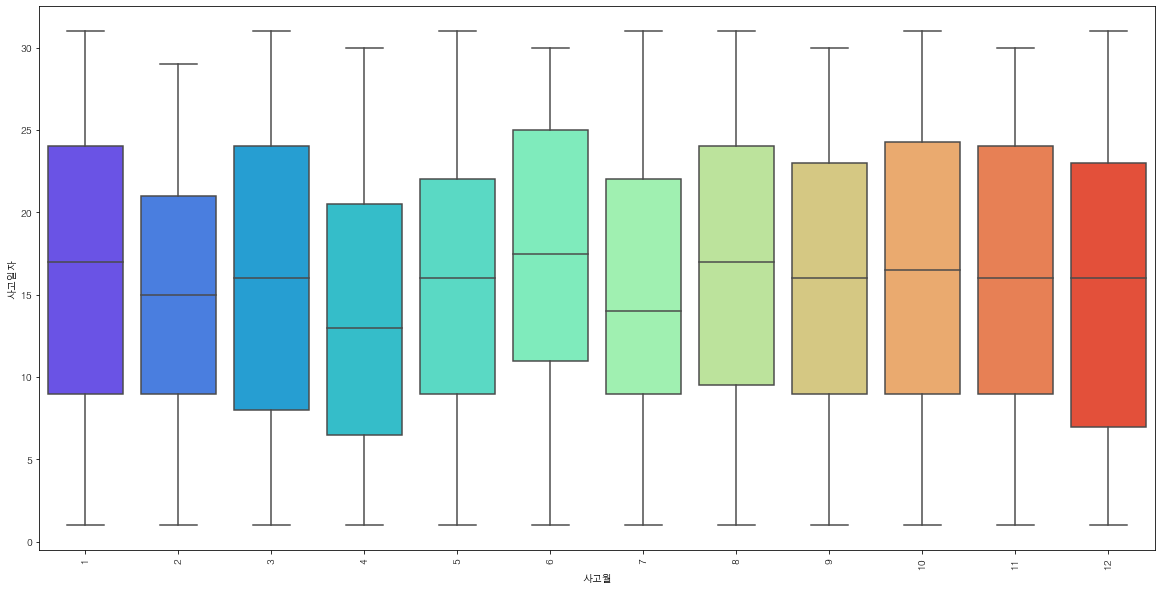

In [45]:
plt.figure(figsize=(20,10))
g = sns.boxplot(x='사고월', y='사고일자', data=data_1, palette='rainbow')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### 로그변환..   로그스케일러랑은 다르다!! 일단 스케일러랑은 다르다!!

In [46]:
#끝까지돌리고 다시 돌아오자

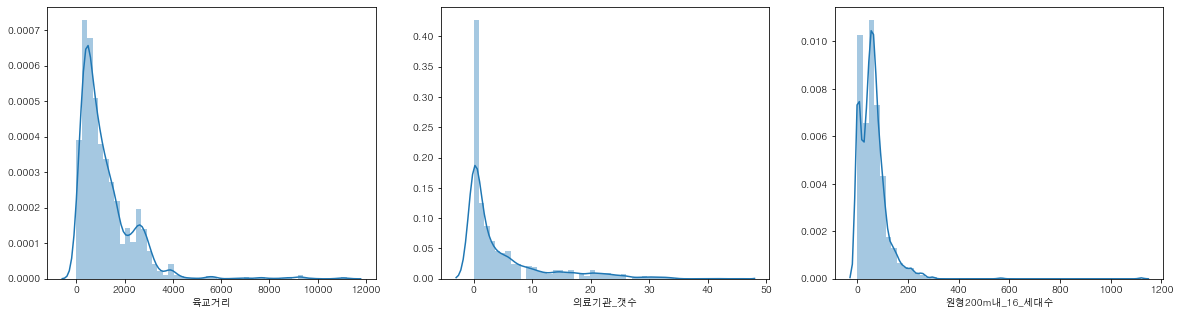

In [47]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3)


sns.distplot(data_1.iloc[:,17],ax=ax[0])
sns.distplot(data_1.iloc[:,18],ax=ax[1])
sns.distplot(data_1.iloc[:,19],ax=ax[2])

In [48]:
#하나하나

#  
# 비닝/원핫/더미 변수

In [49]:
# 변수명이 너무 제멋대로네ㅋㅋㅋㅋ
# 재조정 해주자

In [50]:
# 음주/어린이/노인 재정립해주기

In [51]:
# 여기가 정신적으로 고통스럽네

In [52]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '음주운전사고', '어린이사고',
       '노인사고', '보행자사고', '법규위반내용', '은행거리', '교차로거리', '의료기관거리', '버스정류장거리',
       '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수', '원형200m내_16_세대수',
       '원형200m내_16_인구수', '원형200m내_16_10대인구', '원형200m내_16_20대인구',
       '원형200m내_16_30대인구', '원형200m내_16_40대인구', '원형200m내_16_50대인구',
       '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동', '사고유형', '노면상태',
       '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [53]:
print(data_1.isnull().sum().sum())

0


In [54]:
data_1.사고요일

id
608964    화요일
608738    일요일
608784    목요일
609111    수요일
608264    금요일
         ... 
607974    수요일
607978    금요일
608031    월요일
608049    토요일
613744    일요일
Name: 사고요일, Length: 2256, dtype: object

In [55]:
data_1.보행자사고.value_counts()   #이것도 빼자

O       2253
None       3
Name: 보행자사고, dtype: int64

In [56]:
data_1.loc[(data_1.사고요일=='월요일') | (data_1.사고요일=='화요일') | (data_1.사고요일=='수요일') | (data_1.사고요일=='목요일') |
          (data_1.사고요일=='금요일') ,'사고요일'] = '주중'

#data_1.loc[(data_1.사고요일=='토요일') | (data_1.사고요일=='일요일') ,'사고요일'] = '주말'

In [57]:
data_1.사고요일

id
608964     주중
608738    일요일
608784     주중
609111     주중
608264     주중
         ... 
607974     주중
607978     주중
608031     주중
608049    토요일
613744    일요일
Name: 사고요일, Length: 2256, dtype: object

In [58]:
#이거 편하네


data_1 =pd.get_dummies(data_1, columns =['사고요일'])

In [271]:
data_1.drop(['사고요일_토요일','사고요일_일요일'],axis=1,inplace=True)

In [59]:
data_1['음주운전사고']

id
608964    None
608738       O
608784    None
609111    None
608264    None
          ... 
607974    None
607978    None
608031    None
608049    None
613744    None
Name: 음주운전사고, Length: 2256, dtype: object

In [60]:
#결측치 지정이란 방법을 찾아보자


data_1['음주운전사고'].value_counts()

None    2209
O         47
Name: 음주운전사고, dtype: int64

In [61]:
type(data_1['음주운전사고'][0])

str

In [62]:
data_1['음주운전사고'][1]   #대문자 O였어!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

'O'

In [63]:
type(data_1['음주운전사고'][1])

str

In [64]:
data_1['음주운전사고'].isnull().sum()

0

In [65]:
type(data_1['어린이사고'][0])

str

In [66]:
data_1['어린이사고'][0]

'None'

In [67]:
data_1['음주운전사고'] = data_1['음주운전사고'].apply(lambda x : 1 if x=='O' else 0)

In [68]:
data_1['음주운전사고'].value_counts()

0    2209
1      47
Name: 음주운전사고, dtype: int64

In [69]:
data_1['어린이사고'] = data_1['어린이사고'].apply(lambda x : 1 if x=='O' else 0)

In [70]:
data_1['어린이사고'].value_counts()

0    2003
1     253
Name: 어린이사고, dtype: int64

In [71]:
data_1['노인사고'] = data_1['노인사고'].apply(lambda x : 1 if x=='O' else 0)

In [72]:
data_1['노인사고'].value_counts()

0    1683
1     573
Name: 노인사고, dtype: int64

[스킵)라이트 지비엠으로](#lgbm)

# 추가변수(이건 머 건들꺼 없지ㅋㅋ) 

### 위쪽에서 이 과정을 해주는게 더 좋았을꺼 같긴하다

In [76]:
data_2 = data_1.copy()

In [77]:
season_1 = []
for i in data_2['사고월']:
    if i >=3 and i<=5:
        season_1 = '봄'
    elif i >=6 and i<=8:
        season_1 = '여름'
    elif i >=9 and i<=11:
        season_1 = '가을'
    elif i == 12 and i == 1 and i==2:
        season_1 = '겨울'
        
data_2['season_'] =season_1

In [78]:
seperate_four = []

for season, time in zip(data_2['season_'], data_2['사고시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
        
data_2['하루분기'] = seperate_four

In [79]:
# 변수 세팅덜 끝남
# 순화변수

In [80]:
#중상자랑 경상자수가 왜 비슷하지?
#이걸 클러스터일 할수 있었는데;; 모르겠넹

In [81]:
# 뭘버릴지 선택해야된다.

#더미화 한것 순서도 생각해야된다.

# EDA

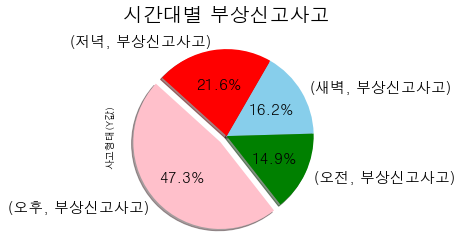

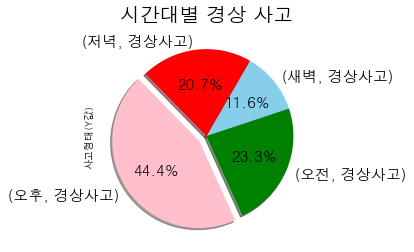

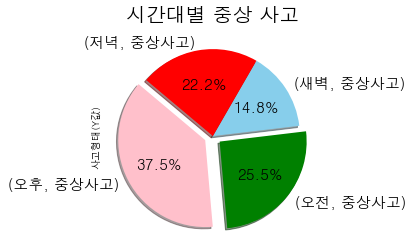

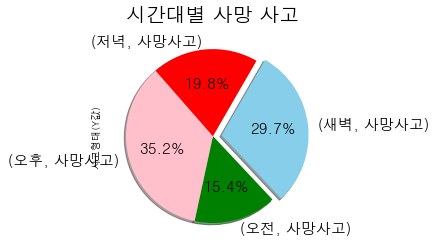

In [83]:
%matplotlib notebook
%matplotlib inline
#plt.rcParams["figure.figsize"] = (20,20)

example = data_2.copy()   #좋네

plt.figure(0)
plt.title('시간대별 부상신고사고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile.png', dpi=fig.dpi)

plt.figure(1)
plt.title('시간대별 경상 사고',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile2.png', dpi=fig.dpi)


plt.figure(2)
plt.title('시간대별 중상 사고',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0.1,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile3.png', dpi=fig.dpi)


plt.figure(3)
plt.title('시간대별 사망 사고',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0.1,0,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile4.png', dpi=fig.dpi)

In [84]:
line_1 = example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_2 = example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_3 = example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_4 = example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].count()

In [85]:
line_1 =pd.DataFrame(line_1)
line_2 =pd.DataFrame(line_2)
line_3 =pd.DataFrame(line_3)
line_4 =pd.DataFrame(line_4)

In [86]:
concat_line =pd.concat([line_1,line_2,line_3,line_4],axis=1)

In [87]:
concat_line.columns = ['부상신고사고','경상사고','중상사고','사망사고']

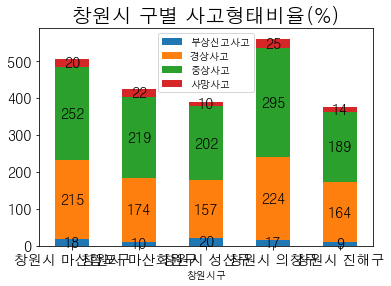

<Figure size 720x720 with 0 Axes>

In [88]:
ax = concat_line.plot(kind='bar', stacked=True, rot=0,fontsize=14) 
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize= 14)


plt.title("창원시 구별 사고형태비율(%)", fontsize = 20)
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (20,12)
plt.sca(ax) 

#fig = plt.gcf()
#fig.savefig('myfile_bar.png', dpi=fig.dpi)

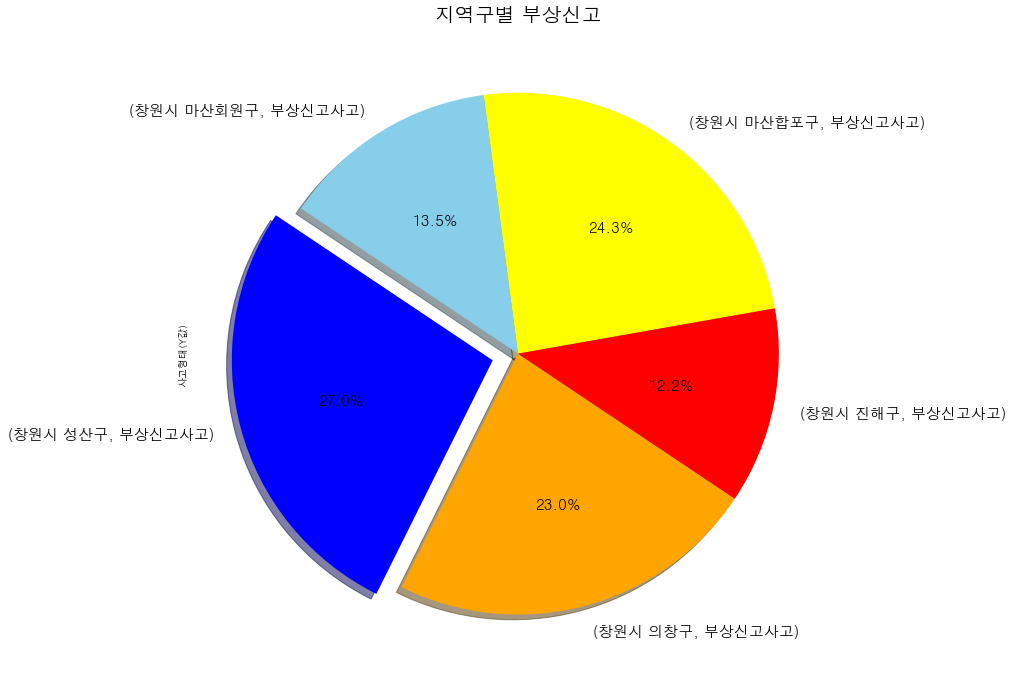

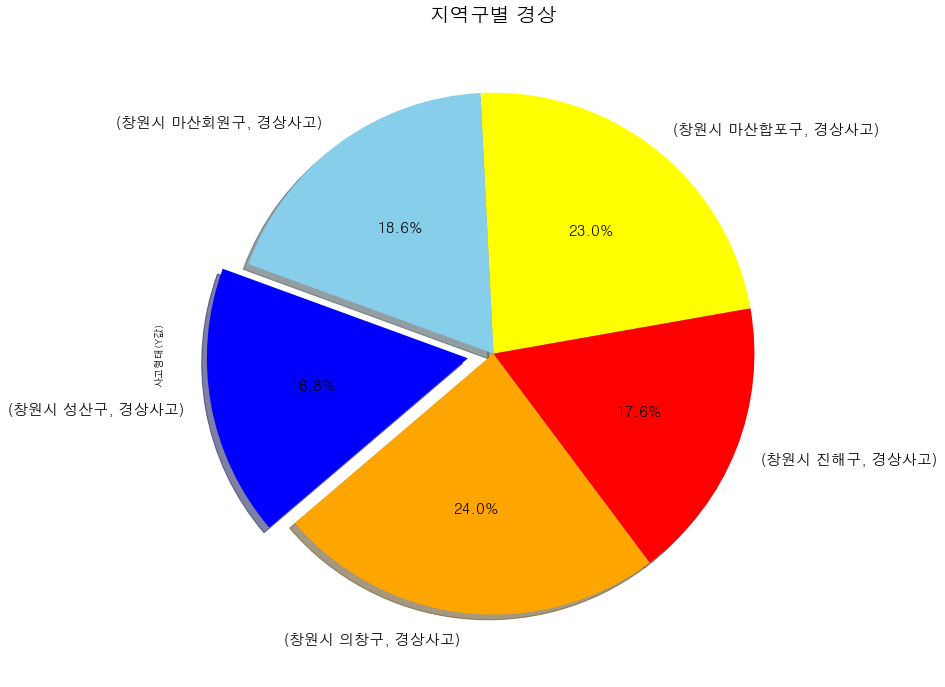

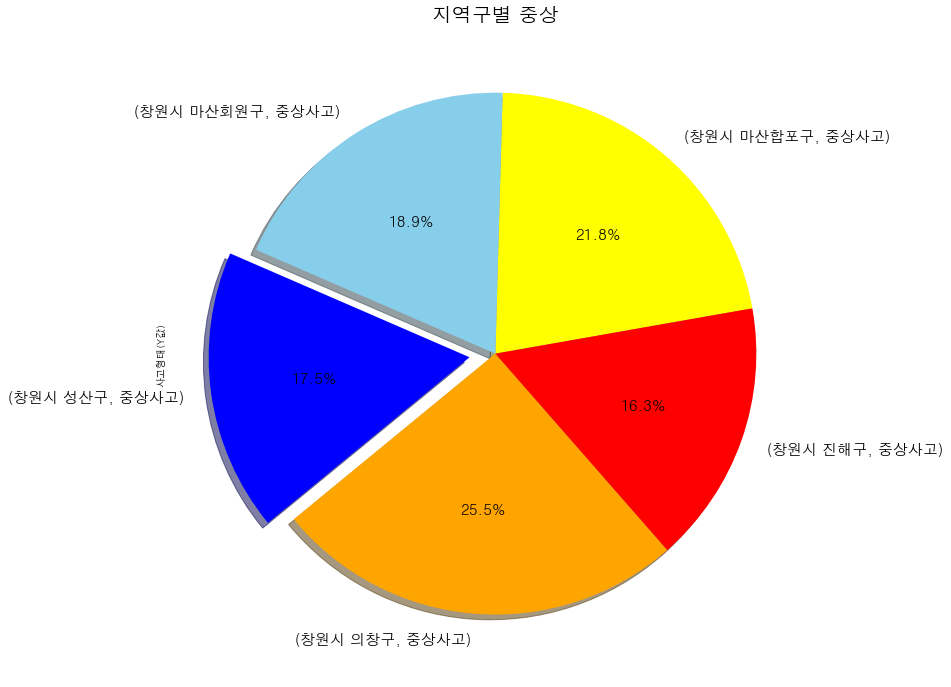

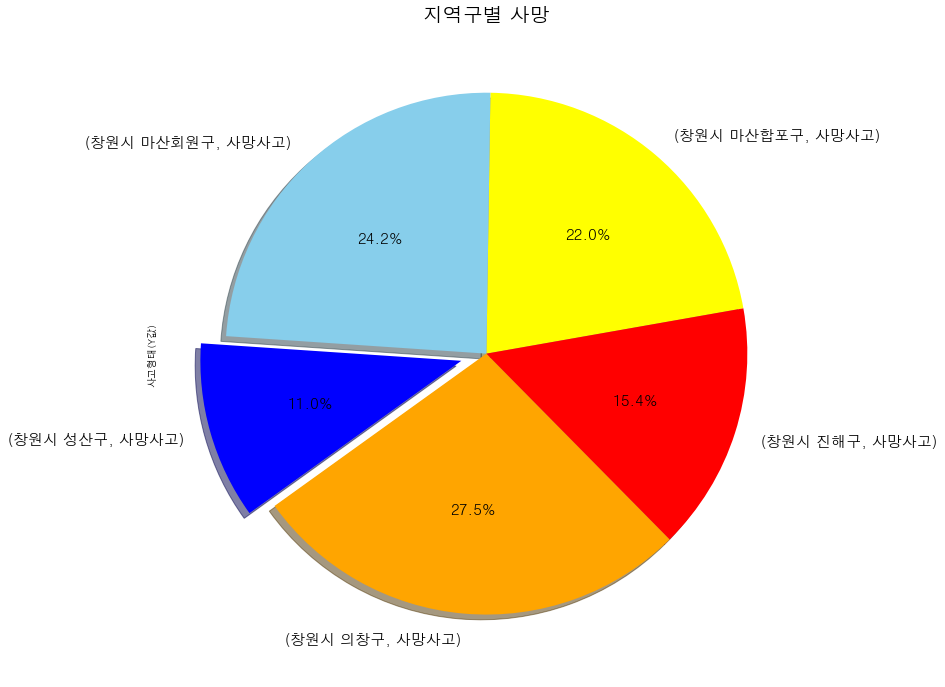

In [89]:
plt.rcParams["figure.figsize"] = (12,12)

plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile0.png', dpi=fig.dpi)


plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile1.png', dpi=fig.dpi)


plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile2.png', dpi=fig.dpi)


plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile3.png', dpi=fig.dpi)

In [90]:
#2016~2018년도 사망사고 비율 확인

In [91]:
example = df[df['사고년도']==2016].copy()

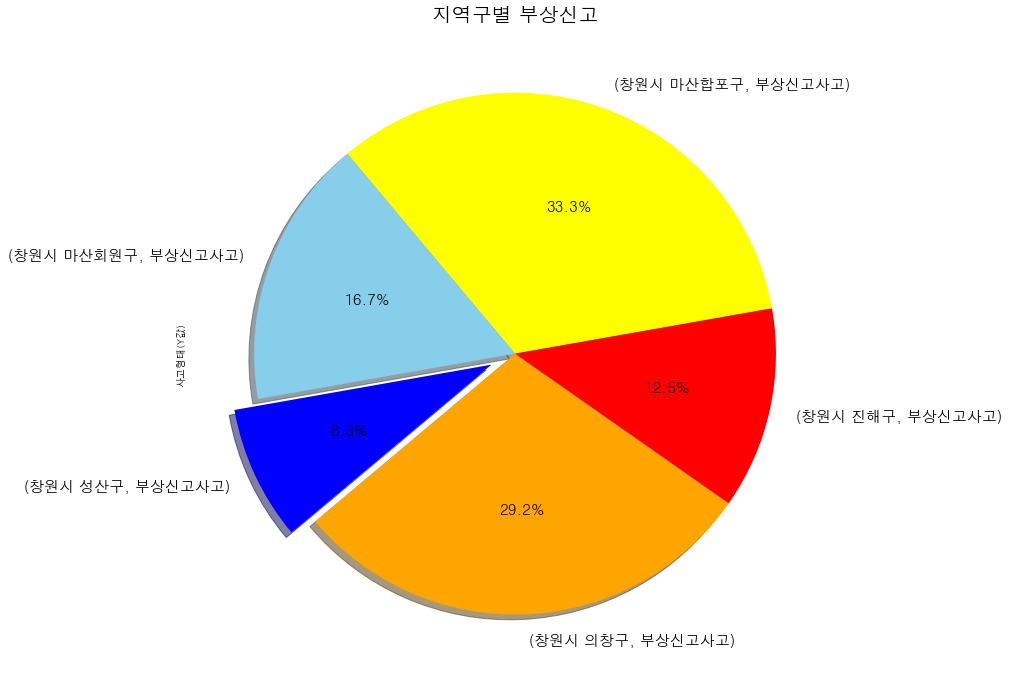

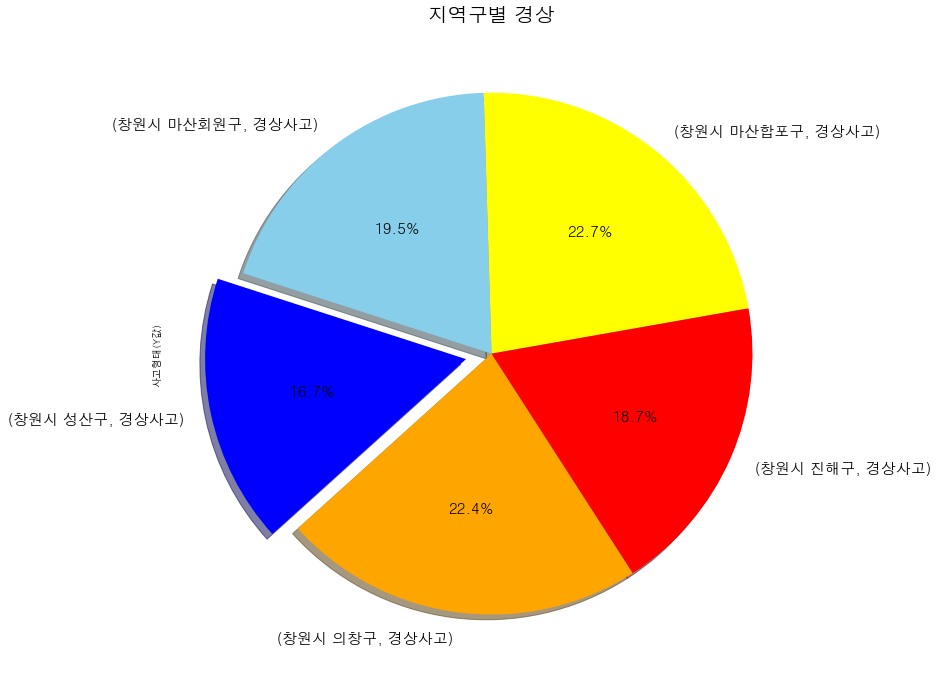

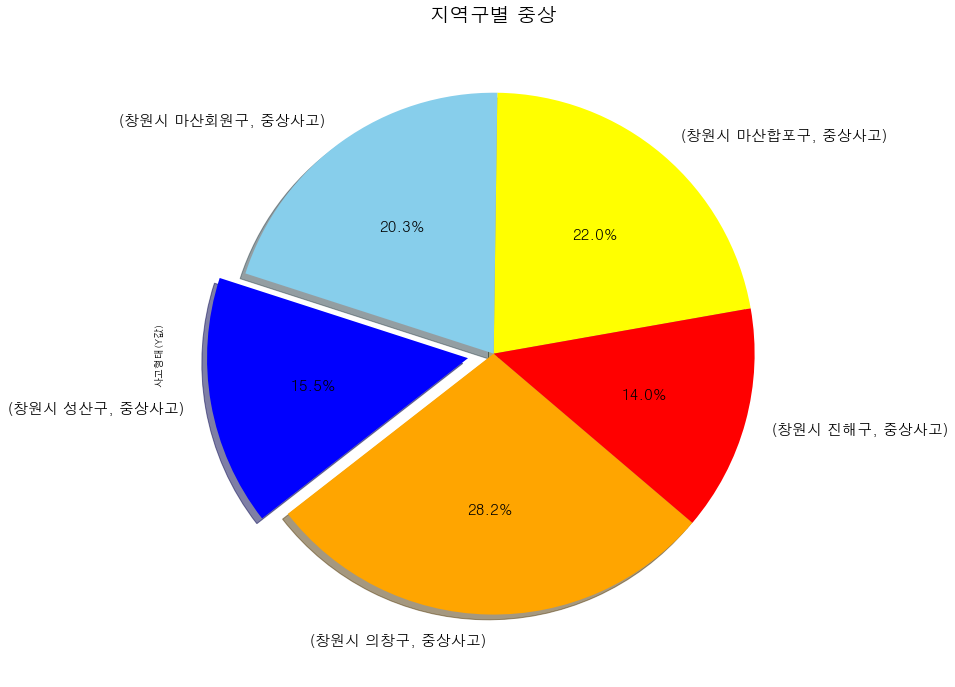

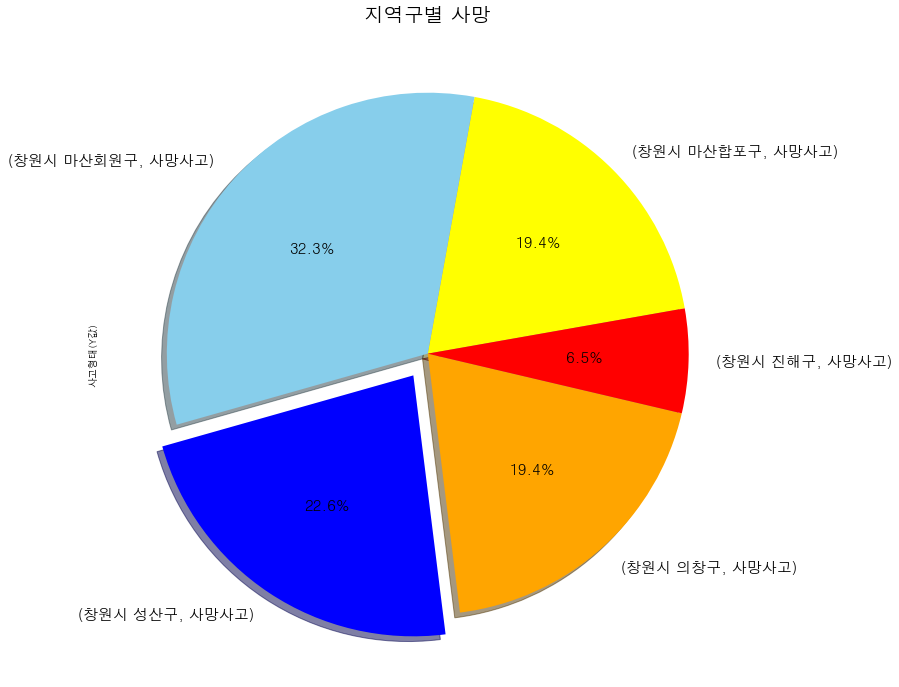

In [92]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

In [93]:
example = df[df['사고년도']==2017].copy()

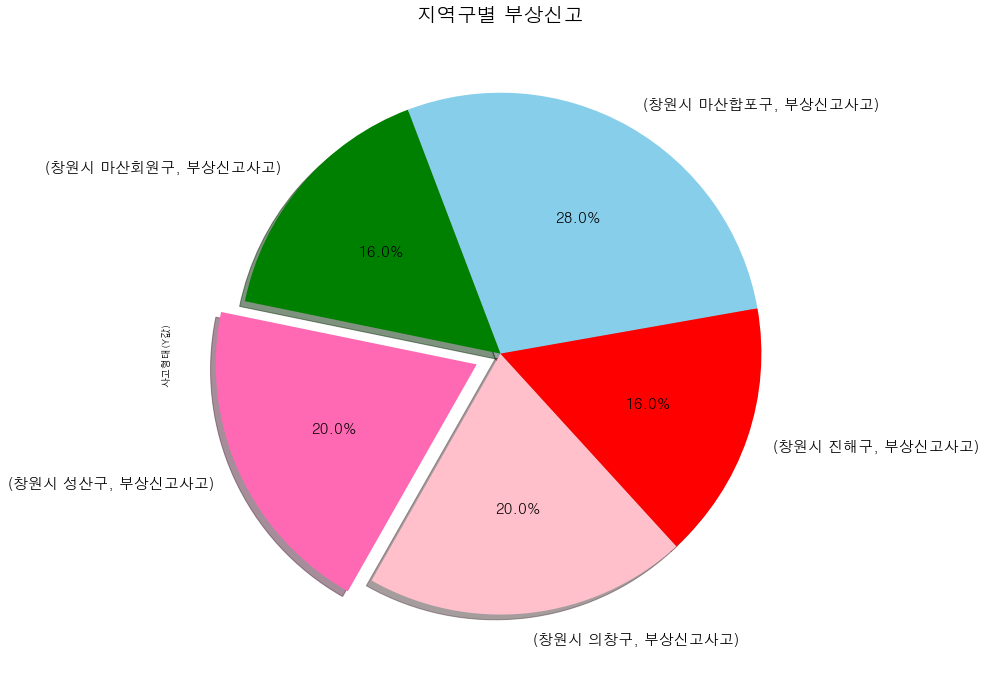

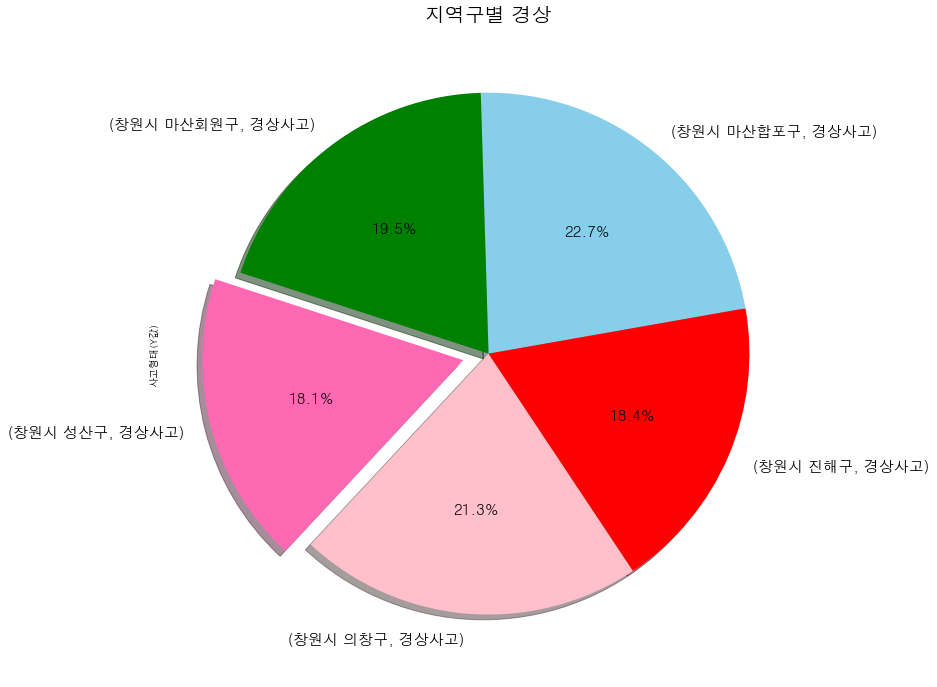

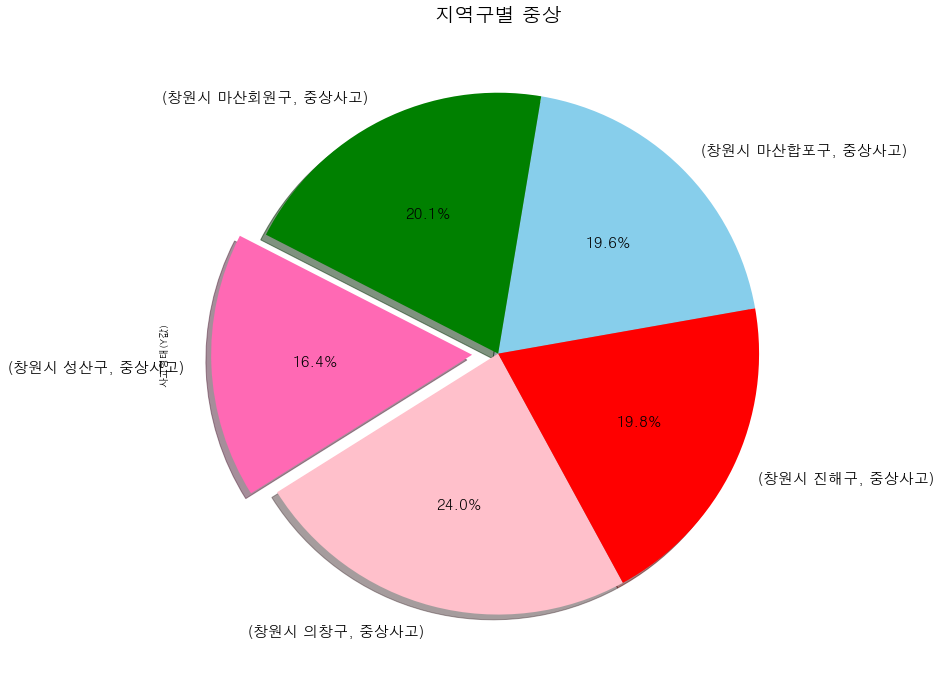

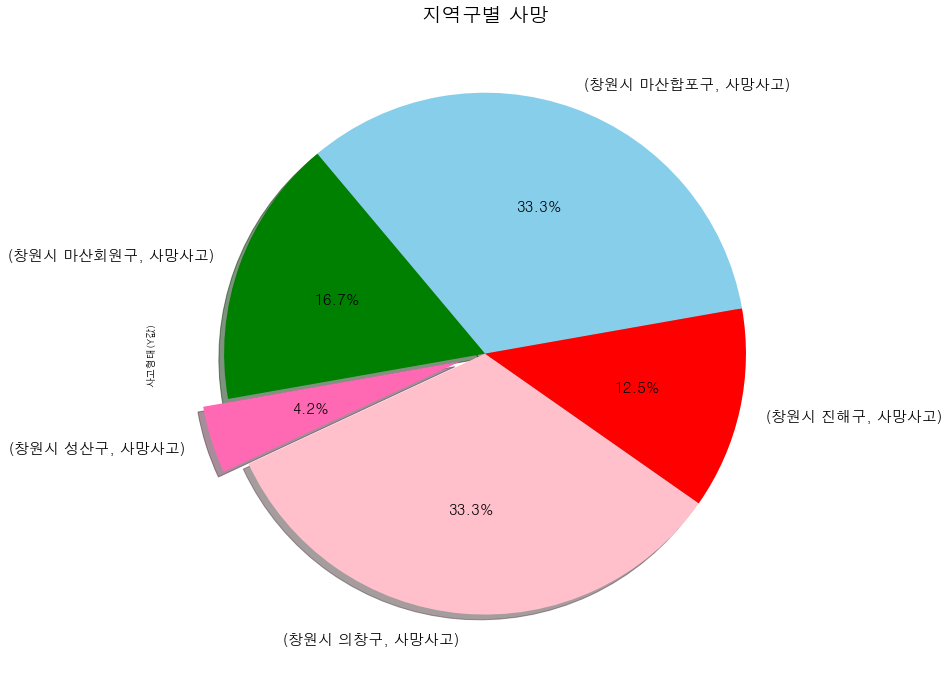

In [94]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

In [95]:
example = df[df['사고년도']==2018].copy()

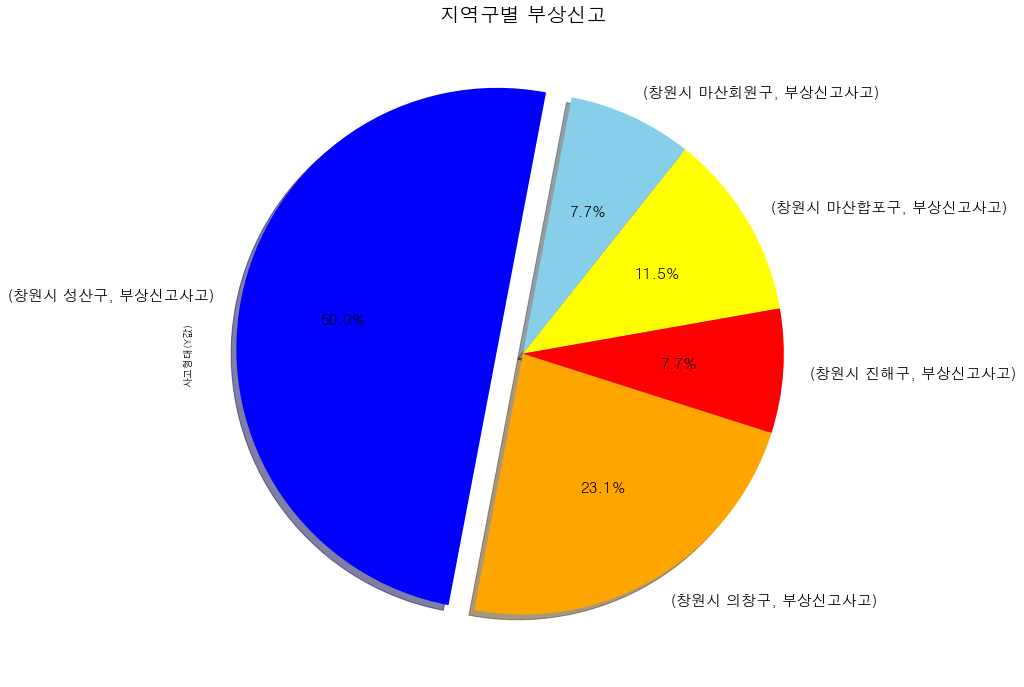

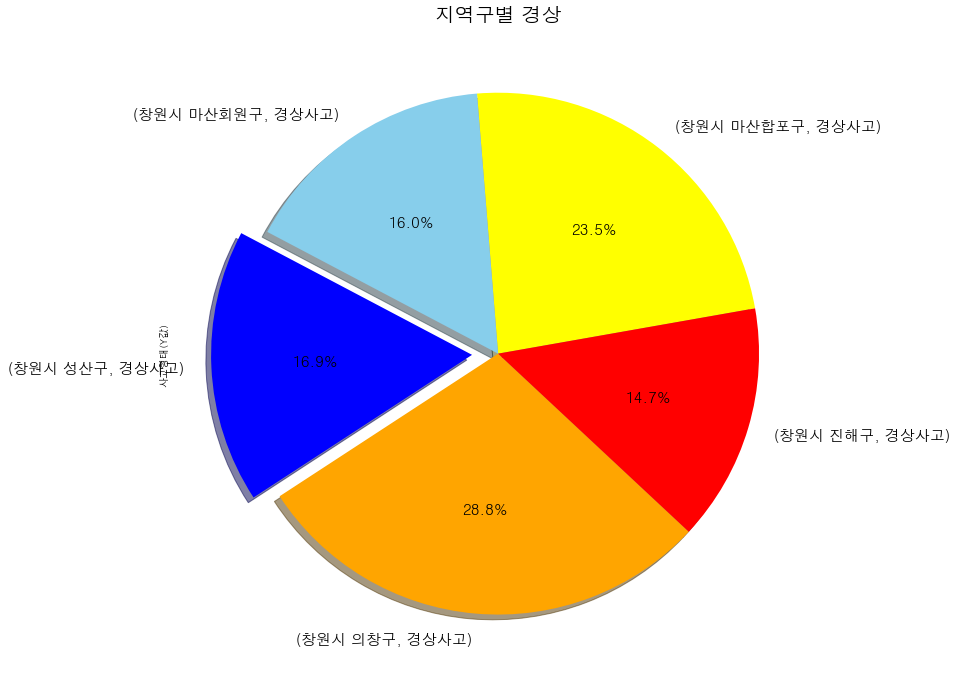

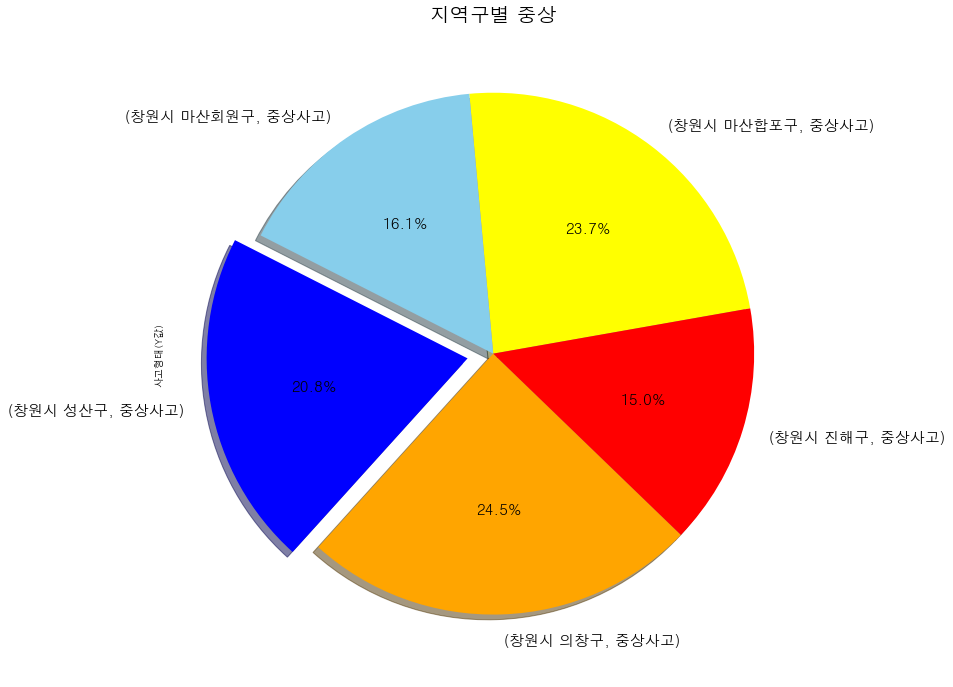

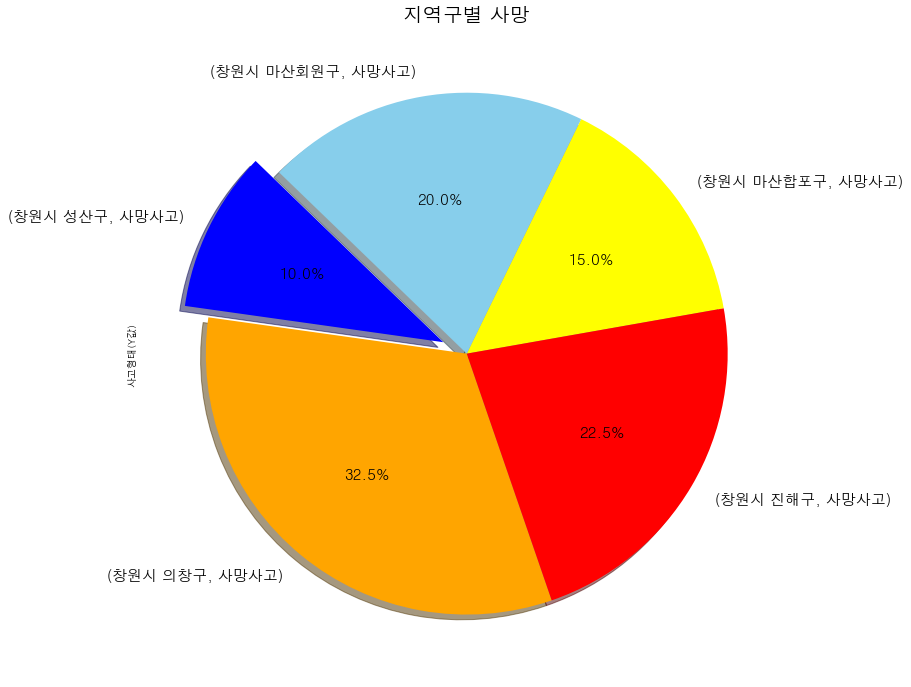

In [96]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

In [97]:
#기조는 편치 않는다.

# 시간별 그래프

In [98]:
#example = data_1[data_1['사고형태(Y값)']=='중상사고'].copy()
#example = data_1[(data_1['사고형태(Y값)']=='경상사고')|(data_1['사고형태(Y값)']=='중상사고') | (data_1['사고형태(Y값)']=='사망사고')].copy()

In [99]:
###


example = data_1.copy()
#example =example[example['기상상태']=='맑음']
#example =example[(example['사고요일']=='월요일')|(example['사고요일']=='화요일')|(example['사고요일']=='수요일')|(example['사고요일']=='목요일')|(example['사고요일']=='금요일')].copy()

In [100]:
example.groupby(['사고시간'])['사고시간'].count()

사고시간
0      67
1      50
2      40
3      30
4      30
5      43
6      58
7      68
8      98
9      84
10     96
11     95
12     97
13     91
14    102
15    120
16    126
17    153
18    187
19    137
20    163
21    115
22    112
23     94
Name: 사고시간, dtype: int64

In [101]:
#example1 =example[example['창원시구']=='창원시 마산합포구'].copy()

In [102]:
#example_2 =example[example['창원시구']=='창원시 진해구']
#example_2

In [103]:
B_line=pd.DataFrame()

example_2 =example[example['창원시구']=='창원시 마산합포구']
#example_2 = example
for i in range(0,24):
    a_line = pd.DataFrame(data={'시간':example_2.groupby(['사고시간'])['사고시간'].count()[i]/example_2.groupby(['사고시간'])['사고시간'].count().sum()},index=[i])
    B_line = pd.concat([B_line,a_line],axis=0)
    B_line

In [104]:
# 함수화 시키자!!

In [105]:
#example_2 =example[example['창원시구']=='창원시 마산합포구']
#example_2 = example
#for i in range(0,24):
    a_line = pd.DataFrame(data={'시간':example_2.groupby(['사고시간'])['사고시간'].count()[i]/example_2.groupby(['사고시간'])['사고시간'].count().sum()},index=[i])
    B_line = pd.concat([B_line,a_line],axis=0)
    B_line

IndentationError: unexpected indent (<ipython-input-105-3305c5223e7c>, line 4)

In [106]:
#전체_시간순 = B_line
#마산합포구_시간순 = B_line
#마산회원구_시간순 = B_line
#의창구_시간순 = B_line
#성산구_시간순 = B_line
#진해구_시간순 = B_line

In [187]:
#새로한건 뭔가를 잘못했다;;

전체_시간순 = 전체_시간순/2

In [188]:
print(example.groupby(['하루분기'])['사고시간'].count()[0]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[1]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[2]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[3]/example.groupby(['하루분기'])['사고시간'].count().sum())

0.17177914110429449
0.2085889570552147
0.3444347063978966
0.2751971954425942


In [189]:
example[example['창원시구']=='창원시 마산합포구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0     17
1     13
2      5
3      7
4      7
5     13
6     20
7     15
8     17
9     15
10    28
11    22
12    28
13    19
14    30
15    30
16    31
17    29
18    45
19    32
20    26
21    27
22    17
23    16
Name: 사고시간, dtype: int64

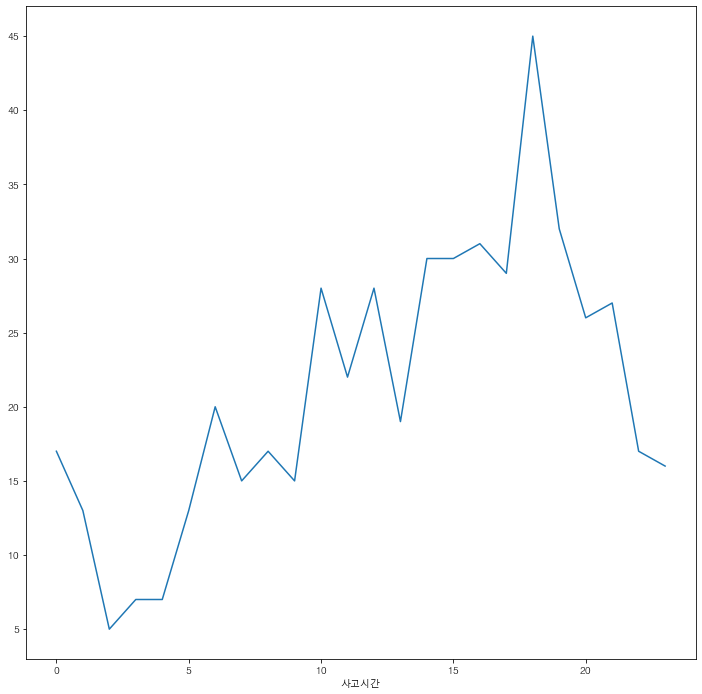

In [190]:
example[example['창원시구']=='창원시 마산합포구'].groupby(['사고시간'])['사고시간'].count().plot()

In [195]:
전체_시간순.columns=['전체_시간별']
마산합포구_시간순.columns=['합포구_시간별']
마산회원구_시간순.columns=['회원구_시간별']
의창구_시간순.columns=['의창구_시간별']
성산구_시간순.columns=['성산구_시간별']
진해구_시간순.columns=['진해구_시간별']

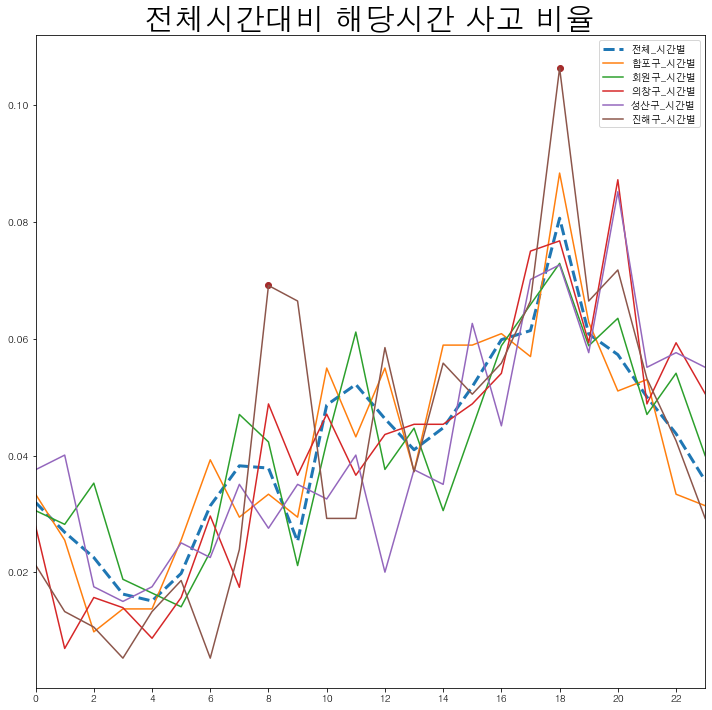

In [196]:
plt.xlim(0,23)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])

전체_시간순['전체_시간별'].plot(linewidth = 3,linestyle = '--')
마산합포구_시간순['합포구_시간별'].plot(linestyle = '-')
마산회원구_시간순['회원구_시간별'].plot(linestyle = '-')
의창구_시간순['의창구_시간별'].plot(linestyle = '-')
성산구_시간순['성산구_시간별'].plot(linestyle = '-')
진해구_시간순['진해구_시간별'].plot(linestyle = '-')

plt.legend() 
plt.title('전체시간대비 해당시간 사고 비율',fontsize=30)

plt.scatter(8,진해구_시간순['진해구_시간별'][8],c='brown')
plt.scatter(18,진해구_시간순['진해구_시간별'][18],c='brown')



#   
#  
#  DATA_3

### 사고 이후 알 수있는 정보 삭제

#### -내가 하는 분석 목적에 맞지 않기 때문에 삭제하는게 맞을까?? 이후 어떻게 활용될지 모르는데??

#### -시각화용을 위해 data_1은 남겨두고 2로 이동

#### -여기서 할필요있나??  EDA 끝나고 더 제껴도 될꺼 같은데??

# 순환변수로 바꾸는것도 해줘야지

In [107]:
#그냥 달리기

In [108]:
#가해 운전자 차종이랑 성별 연령은  시각화용으로 다시 해볼까?

In [272]:
data_3 = data_1.copy()

In [273]:
##


#data_2 에서 만든 변수로 월과 시간대를 대체하면 어떨까????

In [274]:
data_3.drop(['가해운전자 차종','가해운전자 성별','가해운전자 연령','가해운전자 상해정도',
            '피해자 차종','피해자 성별','피해자 연령','피해자 상해정도'],axis=1,inplace=True)

In [275]:
data_3.drop(['음주운전사고','어린이사고','노인사고','보행자사고'],axis=1,inplace=True)

In [276]:
# 확신없이 애들 적어두기


#창원시동
data_3.drop(['창원시동'],axis=1,inplace=True)

In [277]:
#data_1.drop(['season_','하루분기'],axis=1,inplace=True)

In [278]:
data_3['사고유형'].value_counts()

차대사람 - 횡단중           1152
차대사람 - 기타             458
차대사람 - 차도통행중          392
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중           77
Name: 사고유형, dtype: int64

In [279]:
data_3['법규위반내용'].value_counts()

안전운전 의무 불이행    1596
보행자 보호의무 위반     412
신호위반            136
기타               61
중앙선 침범           22
교차로 통행방법 위반      19
과속                9
안전거리 미확보          1
Name: 법규위반내용, dtype: int64

In [280]:
#법규위반 중복되니까 위에서 컷하자

#원핫 하기전에 비닝하고 원핫 돌리자!!

In [281]:
#data_3.loc[data_3['사고형태(Y값)'] == '부상신고사고','Y']=False
#data_3.loc[data_3['사고형태(Y값)'] == '경상사고','Y']=False
#data_3.loc[data_3['사고형태(Y값)'] == '중상사고','Y']=True   #true
#data_3.loc[data_3['사고형태(Y값)'] == '사망사고','Y']=True   #true

In [282]:
data_3['사고형태(Y값)']

id
608964    사망사고
608738    중상사고
608784    중상사고
609111    중상사고
608264    중상사고
          ... 
607974    사망사고
607978    중상사고
608031    경상사고
608049    중상사고
613744    중상사고
Name: 사고형태(Y값), Length: 2256, dtype: object

In [283]:
data_3.loc[data_3['사고형태(Y값)'] == '부상신고사고','사고형태(Y값)']=0
data_3.loc[data_3['사고형태(Y값)'] == '경상사고','사고형태(Y값)']=0
data_3.loc[data_3['사고형태(Y값)'] == '중상사고','사고형태(Y값)']=1   #true
data_3.loc[data_3['사고형태(Y값)'] == '사망사고','사고형태(Y값)']=1   #true

In [284]:
data_3['사고형태(Y값)'] = data_3['사고형태(Y값)'].astype(float)

In [285]:
#data_2.drop(['사고형태(Y값)'],axis=1,inplace=True)

In [286]:
la = list(data_3.columns)
lb = list(data_3.corr().columns)
la_sub_lb = [x for x in la if x not in lb]
la_sub_lb

['법규위반내용', '창원시구', '사고유형', '노면상태', '기상상태', '도로형태']

In [287]:
data_3.columns.shape

(33,)

In [288]:
data_3.corr().shape

(27, 27)

In [289]:
#주말도 날려도되겠다.

In [290]:
data_3.기상상태.value_counts()

맑음    1970
비      185
흐림     100
눈        1
Name: 기상상태, dtype: int64

In [291]:
data_3.loc[data_3['기상상태'] == '눈','기상상태']='비'

In [292]:
data_3.기상상태.value_counts()

맑음    1970
비      186
흐림     100
Name: 기상상태, dtype: int64

In [293]:
#더미로 원핫??

#data_3 =pd.get_dummies(data_3, columns =['기상상태'])

In [294]:
# 어느정도 순서가 있으니

#라벨 인코더 말고
data_3.loc[data_3['기상상태'] == '맑음','기상상태']=0
data_3.loc[data_3['기상상태'] == '흐림','기상상태']=1
data_3.loc[data_3['기상상태'] == '비','기상상태']=2

In [295]:
data_3.도로형태.value_counts()

단일로 - 기타           1096
교차로 - 교차로안          439
교차로 - 교차로부근         312
교차로 - 교차로횡단보도내      190
기타 - 기타             113
단일로 - 횡단보도상          78
주차장 - 주차장            10
단일로 - 횡단보도부근         10
단일로 - 교량              5
단일로 - 터널              1
미분류 - 미분류             1
단일로 - 지하차도(도로)내       1
Name: 도로형태, dtype: int64

In [296]:
#기타가 살짝 이상하게 들어갔네
#그냥 교차로를 1로 할까?



data_3['도로형태'] = data_3['도로형태'].apply(lambda x : 1 if x[0:3]=='교차로' else 0)

In [297]:
data_3['도로형태'].value_counts()

0    1315
1     941
Name: 도로형태, dtype: int64

In [298]:
'''
data_3['도로형태'] = data_3['도로형태'].apply(lambda x : '교차로' if x[0:3]=='교차로' else x)
data_3.loc[data_3['도로형태'] == '기타 - 기타','기상상태']='기타'
data_3.loc[data_3['도로형태'] == '주차장 - 주차장','기상상태']='기타'
data_3.loc[data_3['도로형태'] == '미분류 - 미분류','기상상태']='기타'

data_3 =pd.get_dummies(data_3, columns =['도로형태'])
'''

"\ndata_3['도로형태'] = data_3['도로형태'].apply(lambda x : '교차로' if x[0:3]=='교차로' else x)\ndata_3.loc[data_3['도로형태'] == '기타 - 기타','기상상태']='기타'\ndata_3.loc[data_3['도로형태'] == '주차장 - 주차장','기상상태']='기타'\ndata_3.loc[data_3['도로형태'] == '미분류 - 미분류','기상상태']='기타'\n\ndata_3 =pd.get_dummies(data_3, columns =['도로형태'])\n"

In [299]:
#거리 / 인구 묶기

In [300]:
data_3.drop(['원형200m내_16_세대수','원형200m내_16_인구수'],axis=1,inplace=True)

In [301]:
# 세대수가 (10,20,30,40 커버한다 치고)
# 노인(50,60)은 어카냐 80퍼면 높아서;;

In [302]:
data_3['노인층'] = data_3.원형200m내_16_50대인구 + data_3.원형200m내_16_60대이상인구 

In [303]:
data_3.drop(['원형200m내_16_10대인구','원형200m내_16_20대인구','원형200m내_16_30대인구','원형200m내_16_40대인구',
            '원형200m내_16_50대인구','원형200m내_16_60대이상인구'],axis=1,inplace=True)

In [304]:
data_3.drop(['창원시구','사고유형','법규위반내용','노면상태',
               '아동,어린이집거리','의료기관거리','사고년도'],axis=1,inplace=True)  #아래상관관계를 보고 뺀것들??

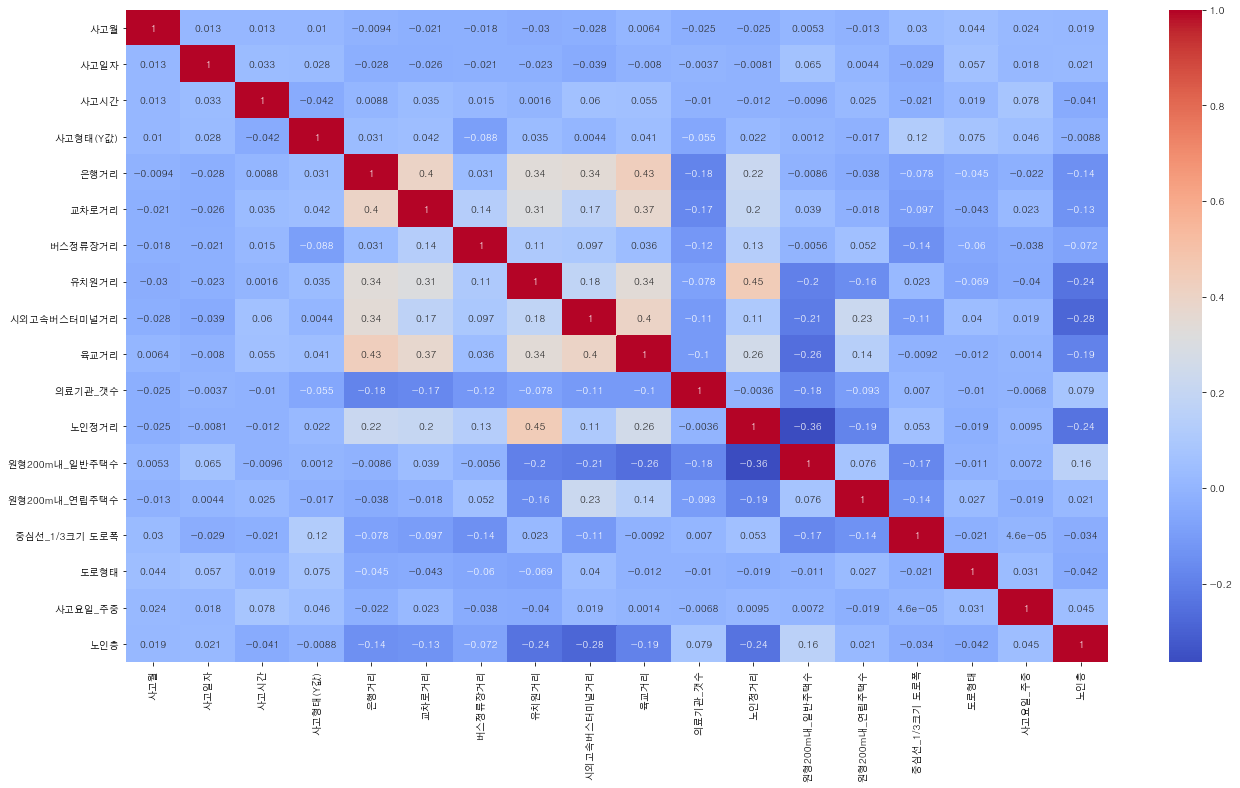

In [305]:
fig, ax = pyplot.subplots(figsize=(22,12))


sns.heatmap(data_3.corr(),annot=True,cmap='coolwarm')

In [306]:
#이제 순환 속성 넣어주자

In [307]:
#data_3['hr_sin'] = np.sin(data_3.사고시간*(2.*np.pi/24))        #0부터 시작하니까 -1 안함
#data_3['hr_cos'] = np.cos(data_3.사고시간*(2.*np.pi/24))
#data_3['mnth_sin'] = np.sin((data_3.사고월-1)*(2.*np.pi/12))
#data_3['mnth_cos'] = np.cos((data_3.사고월-1)*(2.*np.pi/12))

#data_3.drop(['사고시간','사고월'],axis=1,inplace=True)

In [308]:
# dtype을 바꾼다음에 전부 일괄 스케일러 처리 할까?

# 사인 코사인은 남겨둬야겠지?
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사고월            2256 non-null   int32  
 1   사고일자           2256 non-null   int32  
 2   사고시간           2256 non-null   int32  
 3   사고형태(Y값)       2256 non-null   float64
 4   은행거리           2256 non-null   float64
 5   교차로거리          2256 non-null   float64
 6   버스정류장거리        2256 non-null   float64
 7   유치원거리          2256 non-null   float64
 8   시외고속버스터미널거리    2256 non-null   float64
 9   육교거리           2256 non-null   float64
 10  의료기관_갯수        2256 non-null   float64
 11  노인정거리          2256 non-null   float64
 12  원형200m내_일반주택수  2256 non-null   float64
 13  원형200m내_연립주택수  2256 non-null   float64
 14  중심선_1/3크기 도로폭  2256 non-null   float64
 15  기상상태           2256 non-null   object 
 16  도로형태           2256 non-null   int64  
 17  사고요일_주중        2256 non-null   uint8  
 18  노인층   

In [309]:
#여기서 로그변환 해주는게 낫겠지?

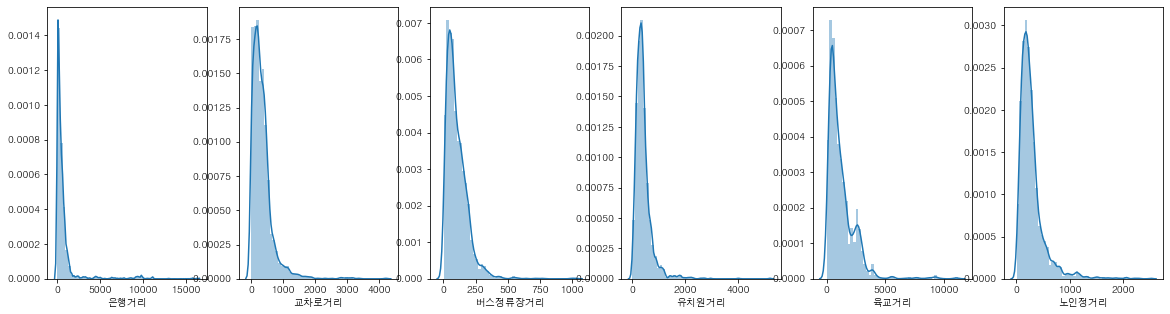

In [310]:
fig,ax = plt.subplots(figsize=(20,5),ncols=6)


sns.distplot(data_3.iloc[:,4],ax=ax[0])
sns.distplot(data_3.iloc[:,5],ax=ax[1])
sns.distplot(data_3.iloc[:,6],ax=ax[2])
sns.distplot(data_3.iloc[:,7],ax=ax[3])
sns.distplot(data_3.iloc[:,9],ax=ax[4])
sns.distplot(data_3.iloc[:,11],ax=ax[5])

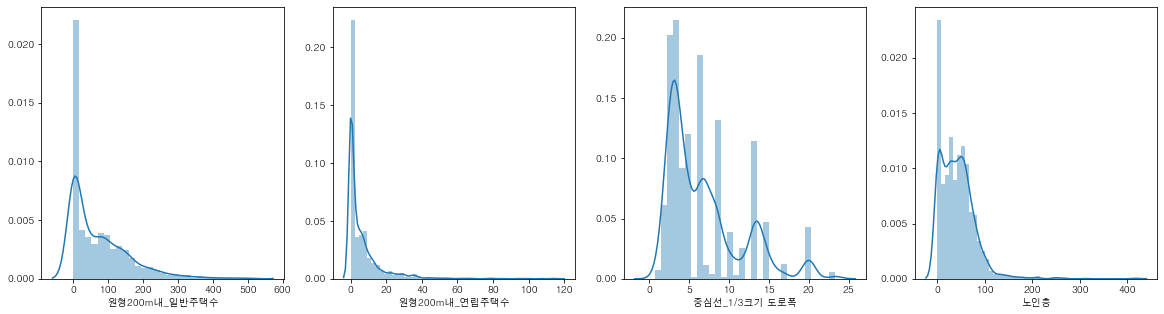

In [312]:
fig,ax = plt.subplots(figsize=(20,5),ncols=4)


sns.distplot(data_3.iloc[:,12],ax=ax[0])
sns.distplot(data_3.iloc[:,13],ax=ax[1])
sns.distplot(data_3.iloc[:,14],ax=ax[2])
sns.distplot(data_3.iloc[:,18],ax=ax[3])

In [313]:
data_3.iloc[:,4] = np.log(data_3.iloc[:,4] +1)
data_3.iloc[:,5] = np.log(data_3.iloc[:,5] +1)
data_3.iloc[:,6] = np.log(data_3.iloc[:,6] +1)
data_3.iloc[:,7] = np.log(data_3.iloc[:,7] +1)
data_3.iloc[:,9] = np.log(data_3.iloc[:,9] +1)
data_3.iloc[:,11] = np.log(data_3.iloc[:,11] +1)

In [315]:
#이것들도 해볼까??

data_3.iloc[:,12] = np.log(data_3.iloc[:,13] +1)
data_3.iloc[:,13] = np.log(data_3.iloc[:,13] +1)
data_3.iloc[:,14] = np.log(data_3.iloc[:,14] +1)
data_3.iloc[:,18] = np.log(data_3.iloc[:,18] +1)

#  
# 모델

In [316]:
# 라이트 지비엠을 위해 다시 영어로 바뀐것들
# 다시 고생좀 해야될듯 아님  xgboost  쓸꺼니까 무시해버리자

In [654]:
Data_3 =data_3.copy()

In [655]:
Data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사고월            2256 non-null   int32  
 1   사고일자           2256 non-null   int32  
 2   사고시간           2256 non-null   int32  
 3   사고형태(Y값)       2256 non-null   float64
 4   은행거리           2256 non-null   float64
 5   교차로거리          2256 non-null   float64
 6   버스정류장거리        2256 non-null   float64
 7   유치원거리          2256 non-null   float64
 8   시외고속버스터미널거리    2256 non-null   float64
 9   육교거리           2256 non-null   float64
 10  의료기관_갯수        2256 non-null   float64
 11  노인정거리          2256 non-null   float64
 12  원형200m내_일반주택수  2256 non-null   float64
 13  원형200m내_연립주택수  2256 non-null   float64
 14  중심선_1/3크기 도로폭  2256 non-null   float64
 15  기상상태           2256 non-null   object 
 16  도로형태           2256 non-null   int64  
 17  사고요일_주중        2256 non-null   uint8  
 18  노인층   

In [656]:
#월빼고는 그래프나 시각화해서 분석해야겠는데??!

Data_3.drop(['사고월','유치원거리','노인정거리','노인층','원형200m내_연립주택수','기상상태'],axis=1,inplace=True)

In [727]:
Data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사고일자           2256 non-null   int32  
 1   사고시간           2256 non-null   int32  
 2   사고형태(Y값)       2256 non-null   float64
 3   은행거리           2256 non-null   float64
 4   교차로거리          2256 non-null   float64
 5   버스정류장거리        2256 non-null   float64
 6   시외고속버스터미널거리    2256 non-null   float64
 7   육교거리           2256 non-null   float64
 8   의료기관_갯수        2256 non-null   float64
 9   원형200m내_일반주택수  2256 non-null   float64
 10  중심선_1/3크기 도로폭  2256 non-null   float64
 11  도로형태           2256 non-null   int64  
 12  사고요일_주중        2256 non-null   uint8  
dtypes: float64(9), int32(2), int64(1), uint8(1)
memory usage: 213.7+ KB


In [657]:
X =Data_3.drop(['사고형태(Y값)'],axis=1)
y = Data_3[['사고형태(Y값)']]

In [658]:
X = X.astype(float)
y = y.astype(bool)

In [659]:
aX_train, aX_test, by_train, by_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [660]:
# 트리든 뭐든 그냥 스케일링 해주자
# 로그 스케일러를 사용할까??
#
#
#
#

In [661]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()

def wow39(wow):
    a =wow
    aX_train[a] = pd.DataFrame(scaler.fit_transform(aX_train[a][:, np.newaxis]), columns=pd.DataFrame(aX_train[a]).columns, index=aX_train[a].index)
    aX_test[a] = pd.DataFrame(scaler.transform(aX_test[a][:, np.newaxis]), columns=pd.DataFrame(aX_test[a]).columns, index=aX_test[a].index)
    return aX_train[a],aX_test[a]

In [662]:
len(X.columns)

12

In [663]:
wow39(X.columns[0])
wow39(X.columns[1])
wow39(X.columns[2])
wow39(X.columns[3])  
wow39(X.columns[4])
wow39(X.columns[5])
wow39(X.columns[6])
wow39(X.columns[7])
wow39(X.columns[8])
wow39(X.columns[9])
wow39(X.columns[10])
wow39(X.columns[11])
#wow39(X.columns[12])
#wow39(X.columns[13])
#wow39(X.columns[14])
#wow39(X.columns[15])
#wow39(X.columns[16])
#wow39(X.columns[17])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

(id
 611869    0.0
 610364    0.0
 613823    0.0
 611155    0.0
 607366    0.0
          ... 
 606976   -1.0
 608738   -1.0
 609032    0.0
 611590    0.0
 610831    0.0
 Name: 사고요일_주중, Length: 1804, dtype: float64,
 id
 612099    0.0
 610845    0.0
 611037   -1.0
 608578   -1.0
 611050    0.0
          ... 
 606058   -1.0
 609773    0.0
 610391    0.0
 609078    0.0
 614402    0.0
 Name: 사고요일_주중, Length: 452, dtype: float64)

In [664]:
#변수 추가 정제 작업 있어야됨

#스케일링 과정이 있긴 해야겠지??
#이건 좀 귀찮은데;;

In [665]:
#xgboost 튜닝하는것 공부해야징

In [666]:
#이거때문에  shape value가 고장났구나
by_train =np.ravel(by_train, order='C')
by_test =np.ravel(by_test, order='C')
by_test.shape

(452,)

#  
# 라쏘

In [667]:
from sklearn.linear_model import LassoLarsCV

reg = Lasso(alpha=0.1)
reg.fit(aX_train, by_train)

Lasso(alpha=0.1)

In [668]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [669]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(aX_train, by_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(aX_train, by_train)
    test_r_squared[ind] = reg.score(aX_test, by_test)

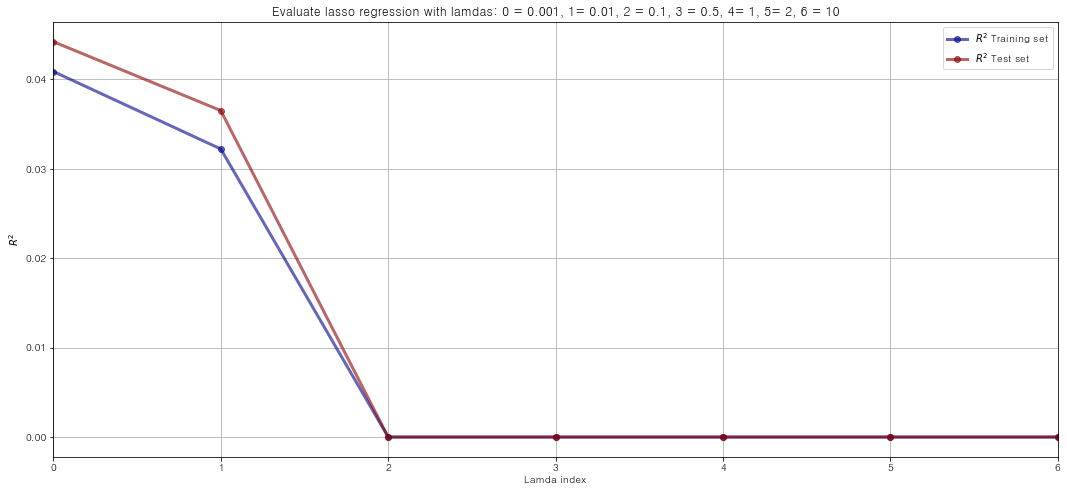

In [670]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [671]:
pred_train, pred_test, tar_train, tar_test = train_test_split(X, y, 
 test_size=.3, random_state=123)

In [672]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


divide by zero encountered in log10
divide by zero encountered in log10


Text(0.5, 1.0, 'Regressionfficients Progression for Lasso Paths')

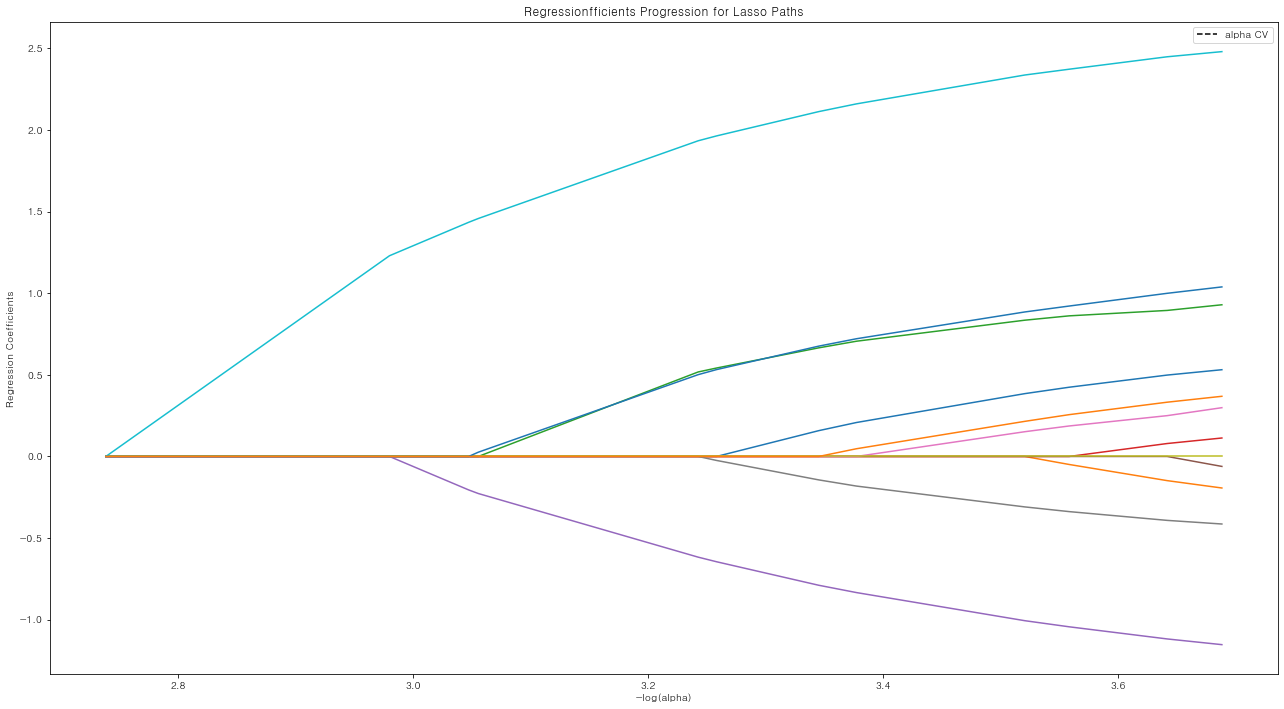

In [673]:
fig, ax = pyplot.subplots(figsize=(22,12))

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.legend(loc='best')
plt.title('Regressionfficients Progression for Lasso Paths')

In [674]:
dict(zip(X.columns,model.coef_))

{'사고일자': 0.0023827903060873964,
 '사고시간': -0.0023640722746627427,
 '은행거리': 0.027184810521834496,
 '교차로거리': 0.010200506179764555,
 '버스정류장거리': -0.04445101426873157,
 '시외고속버스터미널거리': -2.971416396224064e-06,
 '육교거리': 0.017940080147474943,
 '의료기관_갯수': -0.0020267585434503793,
 '원형200m내_일반주택수': -0.014699893471222887,
 '중심선_1/3크기 도로폭': 0.36095730716683666,
 '도로형태': 0.07100348383721844,
 '사고요일_주중': 0.03910733362168265}

# svm

In [585]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', C=10.0, random_state=0, gamma=0.10)
svm.fit(aX_train, by_train)
y_pred_ksvc = svm.predict(aX_test)
print('Accuracy: %.2f' % accuracy_score(by_test, y_pred_ksvc))

Accuracy: 0.63


# 랜덤 트리

In [586]:
from xgboost import XGBClassifier

rf_clf = RandomForestClassifier(random_state=42)
#rf_clf = LogisticRegression()
#rf_clf = XGBClassifier()

In [587]:
rf_clf.fit(aX_train,by_train)

RandomForestClassifier(random_state=42)

In [588]:
rf_pred = rf_clf.predict(aX_test)

In [589]:
from sklearn.metrics import accuracy_score

rf_sc = accuracy_score(by_test,rf_pred)

In [590]:
rf_sc

0.581858407079646

In [591]:
confusion = confusion_matrix(y_true=by_test, y_pred=rf_pred)
print(confusion)

[[ 86 116]
 [ 73 177]]


In [592]:
(confusion[0][0]+confusion[1][1])/confusion.sum()

0.581858407079646

In [593]:
scores = cross_val_score(rf_clf, aX_train, by_train, cv=10)
scores

array([0.57458564, 0.60220994, 0.51381215, 0.51933702, 0.63333333,
       0.57222222, 0.56111111, 0.54444444, 0.58333333, 0.53888889])

AUC - Test Set: 60.29%


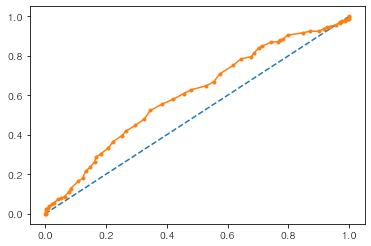

In [594]:
probs = rf_clf.predict_proba(aX_test)
probs = probs[:, 1]

auc = roc_auc_score(by_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(by_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

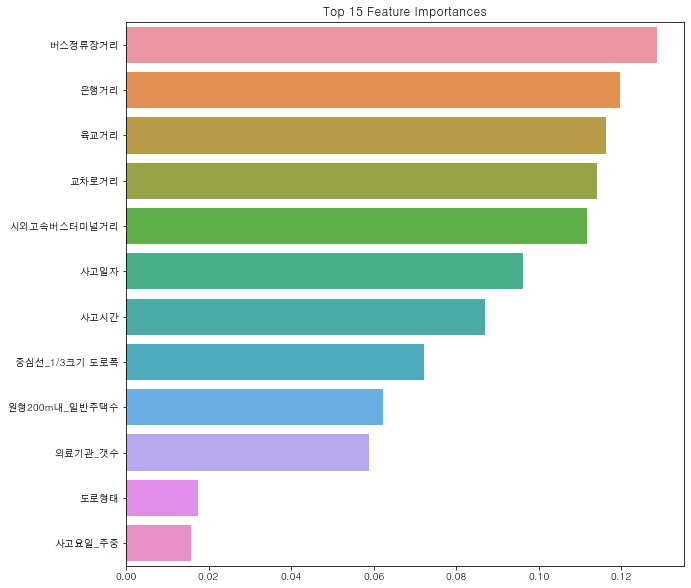

In [595]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = aX_test.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]                   #확늘려볼까??

plt.figure(figsize=(10,10))
plt.title('Top 15 Feature Importances')
sns.barplot(x=ftr_top15, y=ftr_top15.index)
plt.show()

In [596]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))


In [597]:
pred_proba = rf_clf.predict_proba(aX_test)
pred = rf_clf.predict(aX_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba()결과 Shape : (452, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44 0.56]
 [0.42 0.58]
 [0.54 0.46]]


In [598]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(by_test, custom_predict)


오차 행렬
[[ 86 116]
 [ 73 177]]
정확도: 0.5819, 정밀도: 0.6041, 재현율: 0.7080


In [599]:
# 테스트 수행을 위한 모든 임계값을 리스트로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(by_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[ 44 158]
 [ 29 221]]
정확도: 0.5863, 정밀도: 0.5831, 재현율: 0.8840
임계값: 0.45
오차 행렬
[[ 60 142]
 [ 40 210]]
정확도: 0.5973, 정밀도: 0.5966, 재현율: 0.8400
임계값: 0.5
오차 행렬
[[ 86 116]
 [ 73 177]]
정확도: 0.5819, 정밀도: 0.6041, 재현율: 0.7080
임계값: 0.55
오차 행렬
[[117  85]
 [105 145]]
정확도: 0.5796, 정밀도: 0.6304, 재현율: 0.5800
임계값: 0.6
오차 행렬
[[148  54]
 [145 105]]
정확도: 0.5597, 정밀도: 0.6604, 재현율: 0.4200


In [600]:
from sklearn.metrics import f1_score
f1 = f1_score(by_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))
#F1 스코어: 0.7966

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred_prob = rf_clf.predict_proba(aX_test)
get_eval_by_threshold(by_test, pred_prob[:, 1].reshape(-1,1), thresholds)


F1 스코어: 0.6519
임계값: 0
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.1
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.2
오차 행렬
[[  0 202]
 [  4 246]]
정확도: 0.5442, 정밀도: 0.5491, 재현율: 0.9840, F1:0.7049
임계값: 0.3
오차 행렬
[[  6 196]
 [  8 242]]
정확도: 0.5487, 정밀도: 0.5525, 재현율: 0.9680, F1:0.7035
임계값: 0.4
오차 행렬
[[ 44 158]
 [ 29 221]]
정확도: 0.5863, 정밀도: 0.5831, 재현율: 0.8840, F1:0.7027
임계값: 0.5
오차 행렬
[[ 86 116]
 [ 73 177]]
정확도: 0.5819, 정밀도: 0.6041, 재현율: 0.7080, F1:0.6519
임계값: 0.6
오차 행렬
[[148  54]
 [145 105]]
정확도: 0.5597, 정밀도: 0.6604, 재현율: 0.4200, F1:0.5134
임계값: 0.7
오차 행렬
[[180  22]
 [209  41]]
정확도: 0.4889, 정밀도: 0.6508, 재현율: 0.1640, F1:0.2620
임계값: 0.8
오차 행렬
[[201   1]
 [244   6]]
정확도: 0.4580, 정밀도: 0.8571, 재현율: 0.0240, F1:0.0467
임계값: 0.9
오차 행렬
[[201   1]
 [250   0]]
정확도: 0.4447, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임계값: 1
오차 행렬
[[202   0]
 [250   0]]
정확도: 0.4469, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


#  
# 튜닝 랜덤

In [601]:
from sklearn.ensemble import RandomForestClassifier

#forest_clf = RandomForestClassifier(random_state = 42)
forest_scores = cross_val_score(rf_clf,aX_train,by_train,cv=10)
forest_scores.mean()

0.5643278084714549

In [602]:
# 튜닝 더하자

In [603]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
        {'n_estimators': range(50,120,10), 'max_features': [6,7,9,10,11,12], 'max_depth': range(2,5)},
         {'bootstrap': [True],'n_estimators': range(30,120,10), 'max_features': [5,7,9,10,11,12], 'max_depth': range(2,5)},
    ]
forest_cls = RandomForestClassifier(n_jobs=-1,random_state=1)
grid_search = GridSearchCV(estimator=forest_cls,param_grid=param_grid, cv=5,
                           scoring='recall',                                       
                           return_train_score=True,n_jobs=-1)


grid_search.fit(X,y)                                                               
grid_search.best_params_

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'bootstrap': True, 'max_depth': 2, 'max_features': 5, 'n_estimators': 90}

In [675]:
forest = RandomForestClassifier(bootstrap=True, max_depth =2, max_features = 5, n_estimators= 90,random_state=1)
forest.fit(aX_train, by_train)

RandomForestClassifier(max_depth=2, max_features=5, n_estimators=90,
                       random_state=1)

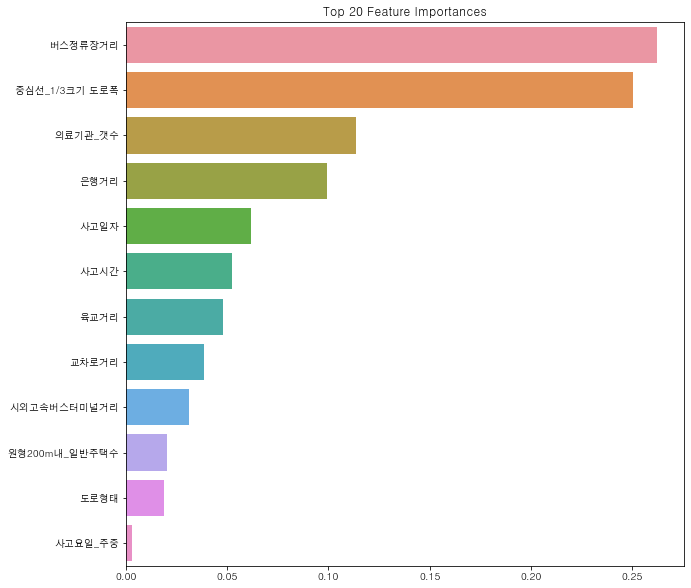

In [676]:
#그리드 서치로 하이퍼 파라미터 정한 랜덤포레스트 기준 변수 중요도 시각화


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(10,10))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
##### 4444444444 x축 수치를 어떻게 해석해야될까??????
plt.show()

AUC - Test Set: 62.48%


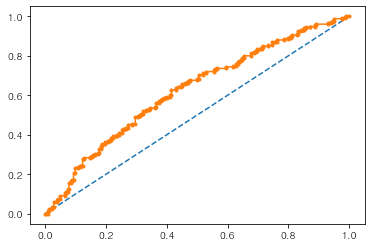

In [677]:
probs = forest.predict_proba(aX_test)
probs = probs[:, 1]

auc = roc_auc_score(by_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(by_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [678]:
print("테스트 데이터 점수:", forest.score(aX_test, by_test))

테스트 데이터 점수: 0.5907079646017699


In [679]:
scores = cross_val_score(forest, aX_test, by_test, cv=10)
print(scores.mean())
print(scores)

0.577536231884058
[0.56521739 0.54347826 0.62222222 0.46666667 0.57777778 0.57777778
 0.57777778 0.71111111 0.51111111 0.62222222]


In [680]:
# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(by_test, custom_predict)

오차 행렬
[[ 89 113]
 [ 76 174]]
정확도: 0.5819, 정밀도: 0.6063, 재현율: 0.6960, F1:0.6480


In [681]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
      
get_eval_by_threshold(by_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[ 55 147]
 [ 44 206]]
정확도: 0.5774, 정밀도: 0.5836, 재현율: 0.8240, F1:0.6833
임계값: 0.45
오차 행렬
[[ 73 129]
 [ 58 192]]
정확도: 0.5863, 정밀도: 0.5981, 재현율: 0.7680, F1:0.6725
임계값: 0.5
오차 행렬
[[ 89 113]
 [ 76 174]]
정확도: 0.5819, 정밀도: 0.6063, 재현율: 0.6960, F1:0.6480
임계값: 0.55
오차 행렬
[[110  92]
 [103 147]]
정확도: 0.5686, 정밀도: 0.6151, 재현율: 0.5880, F1:0.6012
임계값: 0.6
오차 행렬
[[127  75]
 [123 127]]
정확도: 0.5619, 정밀도: 0.6287, 재현율: 0.5080, F1:0.5619


In [682]:
f1 = f1_score(by_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred_prob = rf_clf.predict_proba(aX_test)
get_eval_by_threshold(by_test, pred_prob[:, 1].reshape(-1,1), thresholds)

F1 스코어: 0.6480
임계값: 0
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.1
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.2
오차 행렬
[[  0 202]
 [  4 246]]
정확도: 0.5442, 정밀도: 0.5491, 재현율: 0.9840, F1:0.7049
임계값: 0.3
오차 행렬
[[  6 196]
 [  8 242]]
정확도: 0.5487, 정밀도: 0.5525, 재현율: 0.9680, F1:0.7035
임계값: 0.4
오차 행렬
[[ 44 158]
 [ 29 221]]
정확도: 0.5863, 정밀도: 0.5831, 재현율: 0.8840, F1:0.7027
임계값: 0.5
오차 행렬
[[ 86 116]
 [ 73 177]]
정확도: 0.5819, 정밀도: 0.6041, 재현율: 0.7080, F1:0.6519
임계값: 0.6
오차 행렬
[[148  54]
 [145 105]]
정확도: 0.5597, 정밀도: 0.6604, 재현율: 0.4200, F1:0.5134
임계값: 0.7
오차 행렬
[[180  22]
 [209  41]]
정확도: 0.4889, 정밀도: 0.6508, 재현율: 0.1640, F1:0.2620
임계값: 0.8
오차 행렬
[[201   1]
 [244   6]]
정확도: 0.4580, 정밀도: 0.8571, 재현율: 0.0240, F1:0.0467
임계값: 0.9
오차 행렬
[[201   1]
 [250   0]]
정확도: 0.4447, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임계값: 1
오차 행렬
[[202   0]
 [250   0]]
정확도: 0.4469, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
#랜포 그래프 그리기

In [715]:
y_scores = cross_val_predict(forest, aX_train, by_train, cv=5,
                             method="predict_proba")

In [716]:
y_scores = y_scores[:,1] 

In [717]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(by_train, y_scores)

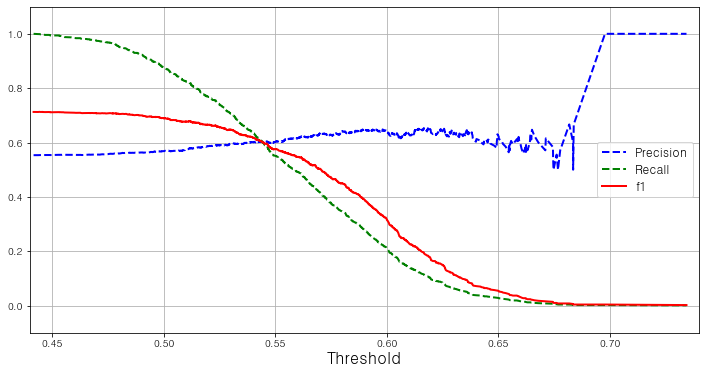

In [725]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
    plt.plot(thresholds, 2*(precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), "r-", label="f1", linewidth=2)
    plt.legend(loc="center right", fontsize=12) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0.44, 0.74, -0.1, 1.1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(12, 6))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
#plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
#plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
#plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
#plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [612]:
#xgb

In [613]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier(random_state=42)

# 초모수 격자생성
xgb_param_grid = {'max_depth': list(range(2,10)), 
                  'subsample': np.linspace(0.4, 1, 7)}

# Create a random search object
xgb_random = RandomizedSearchCV(estimator = xgb_clf,
                                param_distributions = xgb_param_grid,
                                n_iter = 10,
                                scoring='roc_auc', 
                                n_jobs=8, 
                                cv = 3, 
                                refit=True, 
                                return_train_score = True)

# Fit to the training data
xgb_random.fit(aX_train, by_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, reg_alpha=None,
                            

In [614]:
scores = cross_val_score(xgb_random, aX_train, by_train, cv=10)
scores

array([0.58950617, 0.61271605, 0.45160494, 0.52197531, 0.5945    ,
       0.5545    , 0.591     , 0.571875  , 0.56702831, 0.50642225])

In [615]:
dpredictions = xgb_random.predict(aX_test)

accuracy = accuracy_score(by_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.5819


AUC - Test Set: 56.83%


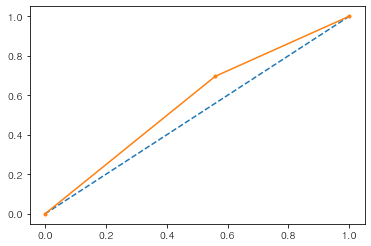

In [616]:
probs = xgb_random.predict(aX_test)
#probs = probs[:, 1]

auc = roc_auc_score(by_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(by_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [617]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))


In [618]:
pred_proba = xgb_random.predict_proba(aX_test)
pred = xgb_random.predict(aX_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba()결과 Shape : (452, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.47467238 0.5253276 ]
 [0.512118   0.48788205]
 [0.31088698 0.689113  ]]


In [619]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(by_test, custom_predict)


오차 행렬
[[ 89 113]
 [ 76 174]]
정확도: 0.5819, 정밀도: 0.6063, 재현율: 0.6960


In [620]:
# 테스트 수행을 위한 모든 임계값을 리스트로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(by_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[ 55 147]
 [ 44 206]]
정확도: 0.5774, 정밀도: 0.5836, 재현율: 0.8240
임계값: 0.45
오차 행렬
[[ 73 129]
 [ 58 192]]
정확도: 0.5863, 정밀도: 0.5981, 재현율: 0.7680
임계값: 0.5
오차 행렬
[[ 89 113]
 [ 76 174]]
정확도: 0.5819, 정밀도: 0.6063, 재현율: 0.6960
임계값: 0.55
오차 행렬
[[110  92]
 [103 147]]
정확도: 0.5686, 정밀도: 0.6151, 재현율: 0.5880
임계값: 0.6
오차 행렬
[[127  75]
 [123 127]]
정확도: 0.5619, 정밀도: 0.6287, 재현율: 0.5080


In [621]:
from sklearn.metrics import f1_score
f1 = f1_score(by_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))
#F1 스코어: 0.7966

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred_prob = rf_clf.predict_proba(aX_test)
get_eval_by_threshold(by_test, pred_prob[:, 1].reshape(-1,1), thresholds)


F1 스코어: 0.6480
임계값: 0
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.1
오차 행렬
[[  0 202]
 [  0 250]]
정확도: 0.5531, 정밀도: 0.5531, 재현율: 1.0000, F1:0.7123
임계값: 0.2
오차 행렬
[[  0 202]
 [  4 246]]
정확도: 0.5442, 정밀도: 0.5491, 재현율: 0.9840, F1:0.7049
임계값: 0.3
오차 행렬
[[  6 196]
 [  8 242]]
정확도: 0.5487, 정밀도: 0.5525, 재현율: 0.9680, F1:0.7035
임계값: 0.4
오차 행렬
[[ 44 158]
 [ 29 221]]
정확도: 0.5863, 정밀도: 0.5831, 재현율: 0.8840, F1:0.7027
임계값: 0.5
오차 행렬
[[ 86 116]
 [ 73 177]]
정확도: 0.5819, 정밀도: 0.6041, 재현율: 0.7080, F1:0.6519
임계값: 0.6
오차 행렬
[[148  54]
 [145 105]]
정확도: 0.5597, 정밀도: 0.6604, 재현율: 0.4200, F1:0.5134
임계값: 0.7
오차 행렬
[[180  22]
 [209  41]]
정확도: 0.4889, 정밀도: 0.6508, 재현율: 0.1640, F1:0.2620
임계값: 0.8
오차 행렬
[[201   1]
 [244   6]]
정확도: 0.4580, 정밀도: 0.8571, 재현율: 0.0240, F1:0.0467
임계값: 0.9
오차 행렬
[[201   1]
 [250   0]]
정확도: 0.4447, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임계값: 1
오차 행렬
[[202   0]
 [250   0]]
정확도: 0.4469, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
#shap_value개념은 전혀 모르겠음ㅠㅠ
#이쁘긴 하다.

In [622]:
import shap
explainer = shap.TreeExplainer(rf_clf,data=aX_test) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(aX_test,check_additivity = False) # Shap Values 계산  ##잘 안되서 억지로 인수넣은상태 check_additivity = False

 95%|=================== | 862/904 [00:16<00:00]       

In [623]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value[1], shap_values[1])

In [624]:
shap.force_plot(explainer.expected_value[1], shap_values[1], aX_test) 

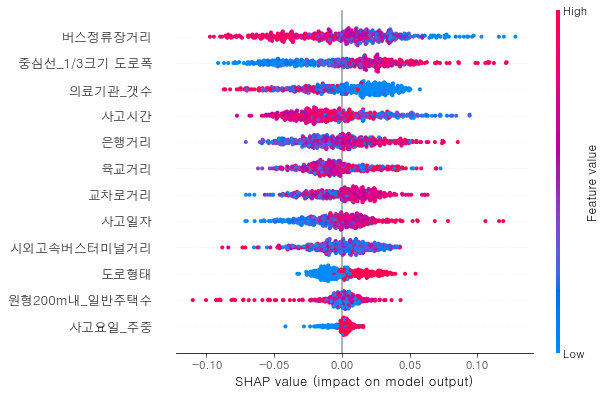

In [625]:
shap.summary_plot(shap_values[1], aX_test)

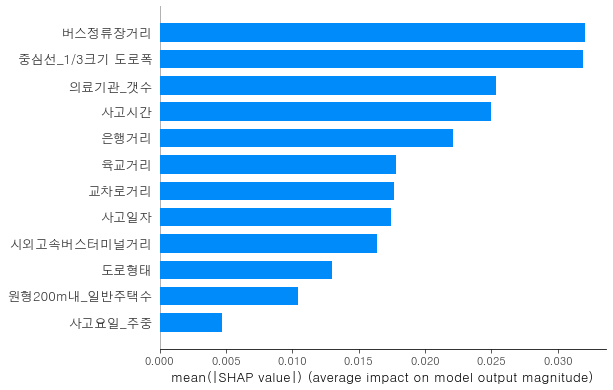

In [626]:
shap.summary_plot(shap_values[1], aX_test, plot_type = "bar")